# Bank Marketing Prediction

## 1. Introducción

El conjunto de datos que abordaremos en este proyecto proviene de la investigación realizada por Sérgio Moro, Paulo Cortez y Paulo Rita en 2014, titulada "A Data-Driven Approach to Predict the Success of Bank Telemarketing". Este estudio se centra en el ámbito del marketing bancario, específicamente en la telemarketing de bancos, y busca prever el éxito de estas campañas utilizando un enfoque basado en datos. El dataset se basa en el conjunto de datos "Bank Marketing" de UCI, pero se enriqueció con la adición de cinco nuevos atributos sociales y económicos.

### Campos del Dataset

**datos del cliente bancario:**

+ 1 - age: Edad (numérico)
+ 2 - job: tipo de trabajo (categórico: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
+ 3 - marital: estado civil (categórico: "divorced","married","single","unknown"; nota: "divorced" significa divorciado o viudo)
+ 4 - educación (categórico: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
+ 5 - default: ¿tiene crédito en mora? (categórico: "no", "yes", "unknown")
+ 6 - housing: ¿tiene préstamo hipotecario? (categórico: "no", "yes", "unknown")
+ 7 - loan: ¿tiene préstamo personal? (categórico: "no", "yes", "unknown")

**relacionado con el último contacto de la campaña actual:**

+ 8 - contact: tipo de comunicación de contacto (categórico: "cellular","telephone")
+ 9 - month: último mes de contacto del año (categórico: "jan", "feb", "mar", ..., "nov", "dec")
+ 10 - day_of_week: último día de contacto de la semana (categórico: "mon","tue","wed","thu","fri")
+ 11 - duration: duración del último contacto, en segundos (numérico). **Nota importante:** este atributo afecta significativamente al objetivo de salida (por ejemplo, si la duración=0, entonces y="no"). Sin embargo, la duración no se conoce antes de realizar una llamada. Además, después del final de la llamada, y es obviamente conocido. Por lo tanto, este dato solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

**otros atributos:**

+ 12 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
+ 13 - pdays: número de días transcurridos después de que el cliente fue contactado por última vez en una campaña anterior (numérico; 999 significa que el cliente no fue contactado anteriormente)
+ 14 - previous: número de contactos realizados antes de esta campaña y para este cliente (numérico)
+ 15 - poutcome: resultado de la campaña de marketing anterior (categórico: "failure","nonexistent","success")

**atributos de contexto social y económico**

+ 16 - emp.var.rate: tasa de variación del empleo - indicador trimestral (numérico)
+ 17 - cons.price.idx: índice de precios al consumidor - indicador mensual (numérico)
+ 18 - cons.conf.idx: índice de confianza del consumidor - indicador mensual (numérico)
+ 19 - euribor3m: tasa euribor a 3 meses - indicador diario (numérico) **Nota importante:** Euribor es el tipo de interés aplicado a las operaciones entre bancos de Europa. Es decir, el porcentaje que paga como tasa un banco cuando otro le presta dinero. Realmente no es un solo tipo de interés, sino la media a la que se prestan los bancos europeos el dinero a un plazo determinado.
+ 20 - nr.employed: número de empleados - indicador trimestral (numérico)

**Variable de salida (objetivo deseado):**

+ 21 - y - ¿el cliente ha suscrito un depósito a plazo? (binario: "yes", "no")

**Valores Faltantes de Atributos:** Hay varios valores faltantes en algunos atributos categóricos, todos codificados con la etiqueta "desconocido". Estos valores faltantes pueden tratarse como una posible etiqueta de clase o utilizando técnicas de eliminación o imputación.

## 2. Objetivo del Proyecto

El objetivo principal de este proyecto es desarrollar un modelo predictivo que pueda determinar si un cliente suscribirá un depósito a plazo bancario. Se plantea abordar esta tarea mediante técnicas de clasificación, donde la variable objetivo es binaria ("sí" o "no"). Se explorarán las relaciones entre las variables disponibles en el conjunto de datos y se aplicarán técnicas de aprendizaje supervisado para lograr la predicción deseada. Las hipótesis iniciales incluyen la expectativa de que ciertos atributos, como la duración del contacto, tendrán un impacto significativo en la decisión del cliente de suscribir un depósito.

## 3. Hipótesis

**3.1.** Se mantiene la expectativa de que ciertos tipos de trabajo ('tjob'), estados civiles ('estado civil') y estado civil ('marital'), en ciertos rangos de edad ('age') seguirán teniendo impacto en la probabilidad de suscripción.

**3.2.** Se espera determinar una relación entre los productos financieros y sus estados ('default', 'housing' y 'loan'), con la predicción del la suscripción del depósito.

**3.3.** La influencia del tipo de comunicación de contacto ('contact'), el mes ('month') y el día de la semana ('day_of_week') en la probabilidad de suscripción se mantendrá, a pesar de la exclusión de 'duration'.

**3.4.** La influencia del número de días transcurridos después de que el cliente fue contactado por última vez en una campaña anterior ('pdays'), el número de contactos realizados antes de esta campaña y para este cliente ('previous') y del resultado de la campaña de marketing anterior ('poutcome') en las suscripciones actuales seguirá siendo una consideración importante.

**3.5.** Se espera que los atributos relacionados con el contexto socioeconómico ('emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' y 'nr.employed') sigan influyendo en las decisiones de suscripción.

## 4. Contexto Comercial

El análisis de este conjunto de datos tiene relevancia en el contexto comercial, ya que puede proporcionar información valiosa para mejorar las estrategias de telemarketing bancario. Al comprender los factores que influyen en la decisión del cliente de suscribir un depósito, los bancos pueden adaptar y optimizar sus campañas, ahorrando recursos y aumentando la efectividad de sus esfuerzos de marketing. Además, la capacidad de prever el éxito de una campaña puede tener un impacto positivo en la rentabilidad de las instituciones financieras al dirigir sus recursos de manera más eficiente.

## 5. EDA

In [1]:
# Importar las bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Cargar los datos
url_dataset = "https://raw.githubusercontent.com/JoaZ94/Bank-Marketing-Classification-Model/main/Dataset%20Bank%20Marketing/bank-additional-full.csv"

df = pd.read_csv(url_dataset, sep = ';')

# ver la información del df
display(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Verifica las dimensiones del conjunto de datos
print(df.shape)

(41188, 21)


In [4]:
# Verifica los tipos de datos de cada columna
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [5]:
# Ver la información del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Ver las caracteristicas del df
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Es completamente lógico que el datase no tenga datos nulos, ya que estos son tratados como 'unknown', en el dataset, por lo tanto, con base a este valor, vamos a averiguar cuanto datos faltantes hay realmente:

In [8]:
# Identifica columnas con valores "unknown"
unk_cols = []

for col in df.columns:
    if 'unknown' in df[col].unique():
        unk_cols.append(col)

print(unk_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [9]:
# Calcula el porcentaje de valores perdidos para esas columnas
for col in unk_cols:
    n_missing = df[df[col] == 'unknown'][col].count()
    pct_missing = n_missing / df.shape[0] * 100
    print(f'{col} - {pct_missing:.2f}% valores perdidos')

job - 0.80% valores perdidos
marital - 0.19% valores perdidos
education - 4.20% valores perdidos
default - 20.87% valores perdidos
housing - 2.40% valores perdidos
loan - 2.40% valores perdidos


Encontramos una **alerta** para la columna **'defualt',** ya que tiene un **20.87% de valores desconocidos (unknown)**

In [10]:
# Analiza las filas con valores desconocidos
unknown_rows = df[df[unk_cols].isin(['unknown']).any(1)]
print(f'Número de filas con algún valor desconocido: {len(unknown_rows)}')

Número de filas con algún valor desconocido: 10700


<ipython-input-10-d3a57c22e7ca>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  unknown_rows = df[df[unk_cols].isin(['unknown']).any(1)]


### Sección Hipótesis 1

Se mantiene la expectativa de que ciertos tipos de trabajo ('tjob'), estados civiles ('estado civil') y estado civil ('marital'), en ciertos rangos de edad ('age') seguirán teniendo impacto en la probabilidad de suscripción.

In [11]:
# Se crean el grupo de varibales que responden a las hipotesis

list_info_cliente = ['age', 'job', 'marital', 'education']
list_info_crediticia = ['default', 'housing', 'loan']
list_info_campania = ['contact', 'month', 'day_of_week'] # Se descarta 'duration'
list_info_camp_ant = ['campaign', 'pdays', 'previous', 'poutcome']
list_info_socioecon = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

A continuación, se conoce la distribución de los valores categoricos de los tipos de empleos **(job),** del estado civil **(marital)** y de la educación **(education).**

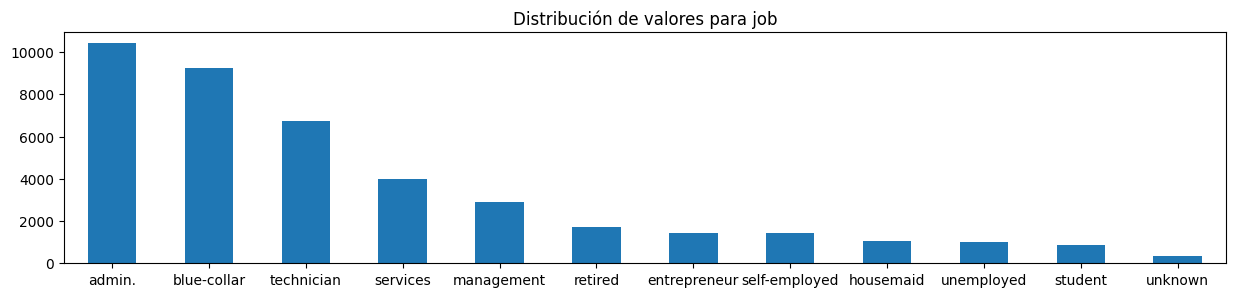

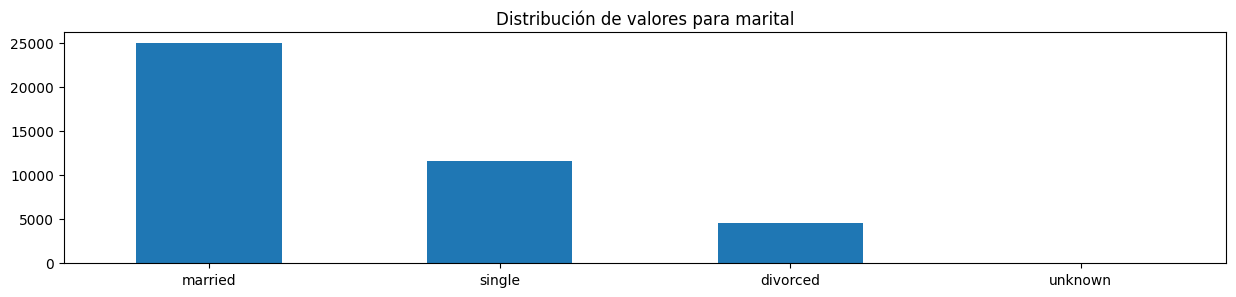

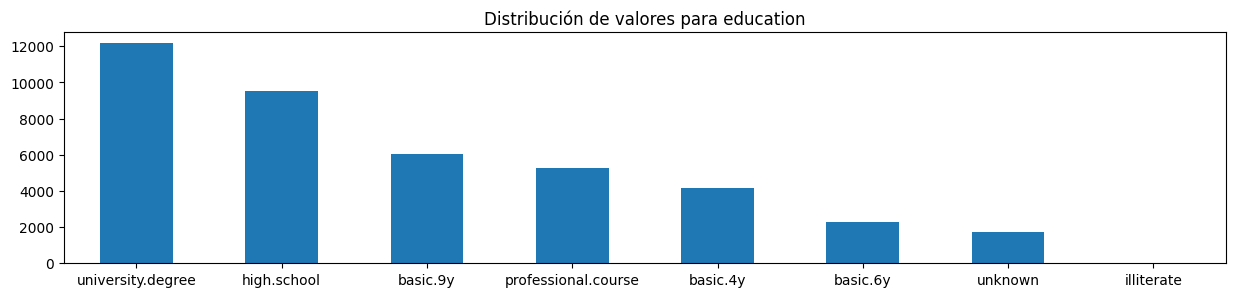

In [12]:
# Visualiza la distribución de valores conocidos vs. desconocidos de  lod datos categóricos del
# cliente ('job', 'marital' y 'education') para la hipótesis 1
for col in unk_cols[0:3]:
    counts = df[col].value_counts()
    plt.figure(figsize=(15,3))
    counts.plot.bar()
    plt.title(f'Distribución de valores para {col}')
    plt.xticks(rotation=0) # Evita que las etiquetas se sobrepongan
    plt.show()

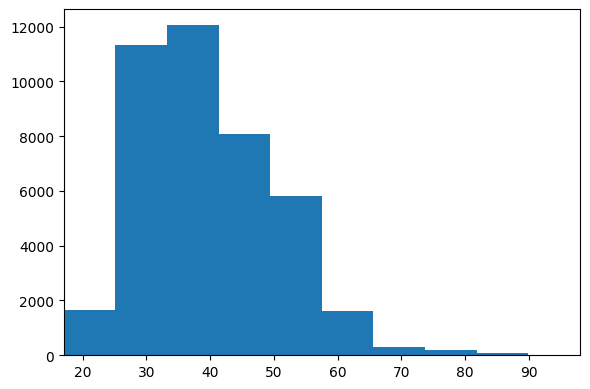

In [13]:
# Histogramas de la variable numérica de la hipótesis 1 'age'
fig, ax = plt.subplots(figsize=(6, 4))

counts, bins, patches = plt.hist(df[list_info_cliente[0]], bins=10)

ax.set_xlim(bins[0], bins[-1])

plt.tight_layout()
plt.show()

En el gráfico anterior, se evidencia una **concentración de usuarios** de las campañas de Marketing, **entre los 25 y los 55 años**, aproximadamente.

A continuación, se explora la posibilidad de una relación entre la edad y la suscripción del Depósito.

<Axes: xlabel='age', ylabel='y'>

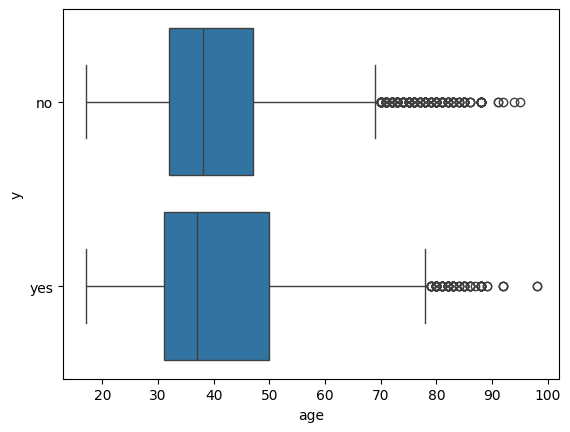

In [14]:
# Edad vs Target
sns.boxplot(data = df, x = 'age', y = 'y')
#plt.scatter(df['age'], df['y'])
#plt.xlabel('Edad')
#plt.ylabel('Target (1=Sí, 0=No)')
#plt.title('Edad vs Suscripción a Depósito')

Con el anternior gráfico, no se evidencia una relación entre la Suscripción al Deposito y la Edad.



<Axes: >

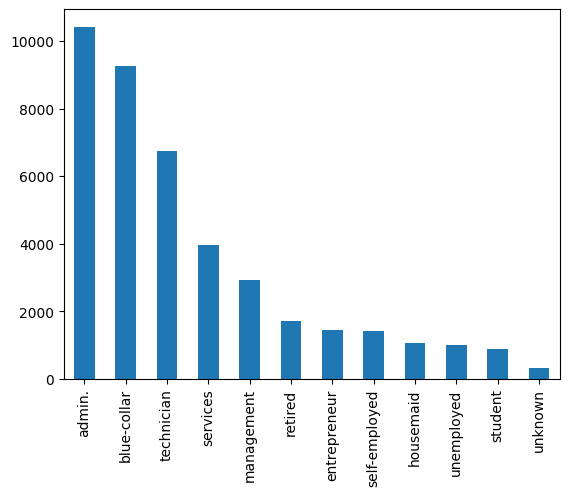

In [15]:
# Distribución de la variable categórica 'job'
dist_job = df['job'].value_counts()
dist_job.plot.bar()

<Axes: xlabel='y', ylabel='age'>

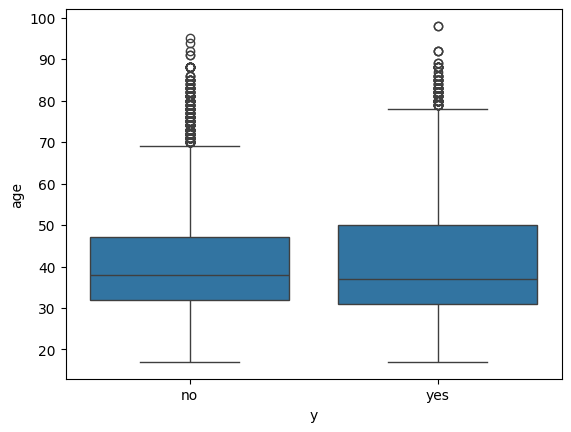

In [16]:
# Otras visualizaciones
sns.boxplot(x='y', y='age', data=df)

<ipython-input-17-7e3cf4506113>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


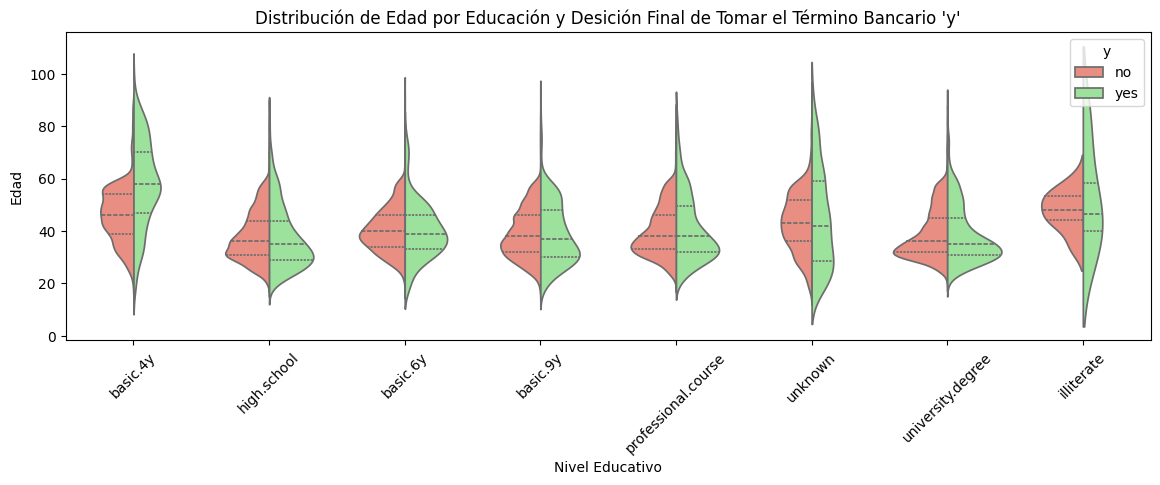

In [17]:
plt.figure(figsize=(14,4))

# Crear diccionario de colores (Mapeo)
hue_colors = {'no': 'salmon', 'yes': 'lightgreen'}

# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="education", y="age", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Edad por Educación y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Nivel Educativo")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

Del gráfico de Distribución de Edad por Educación y Desición Final de Tomar el Término Bancario 'y', se evidencia que **todos los usuarios con educación 'basic.4y', han suscrito el Deposito Bancario.**

<ipython-input-18-c6bebe517395>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


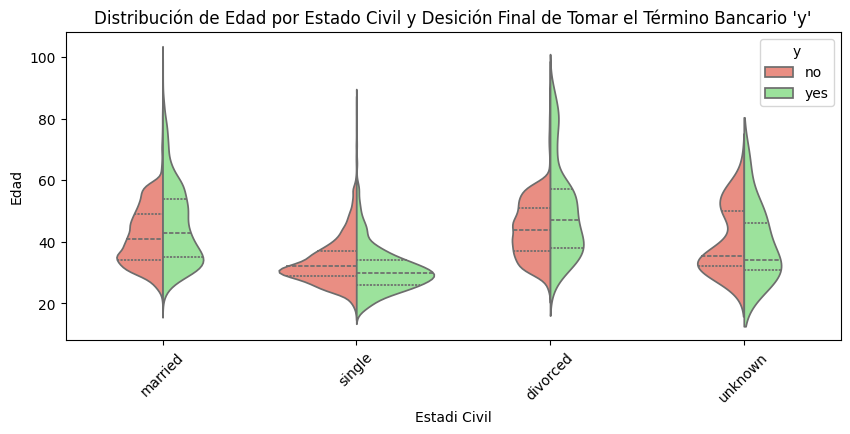

In [18]:
plt.figure(figsize=(10,4))
# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="marital", y="age", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Edad por Estado Civil y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Estadi Civil")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

Del gráfico de Distribución de Edad por Estado Civil y Desición Final de Tomar el Término Bancario 'y', se evidencia que **todos los usuarios con estado civil 'married', han suscrito el Deposito Bancario.**

<ipython-input-19-fa6221d1e8e1>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


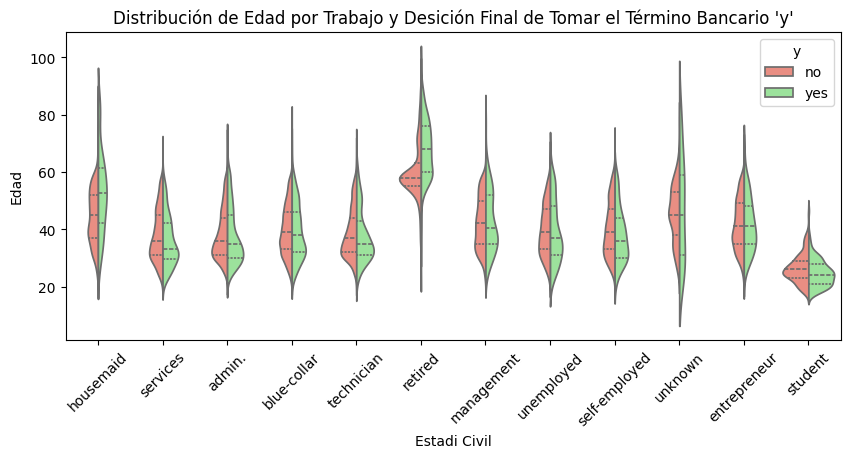

In [19]:
plt.figure(figsize=(10,4))
# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="job", y="age", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Edad por Trabajo y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Estadi Civil")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

Del gráfico de Distribución de Edad por Trabajo y Desición Final de Tomar el Término Bancario 'y', se evidencia que **todos los usuarios con trabajo 'housemaid', han suscrito el Deposito Bancario.**

### Sección Hipótesis 2

Se espera determinar una relación entre los productos financieros y sus estados ('default', 'housing' y 'loan'), con la predicción del la suscripción del depósito.

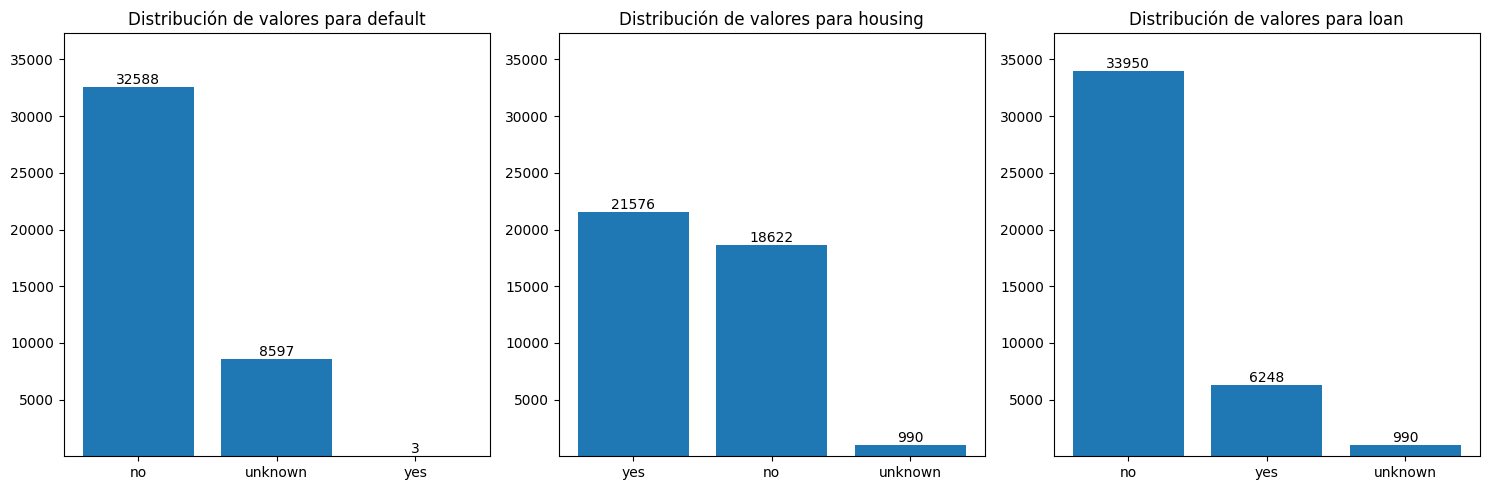

In [20]:
# Encuentra los límites compartidos para el eje y
y_min = min(df[col].value_counts().min() for col in unk_cols[3:6])
y_max = max(df[col].value_counts().max() for col in unk_cols[3:6])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Crea una fila de subgráficos

for i, col in enumerate(unk_cols[3:6]):
    counts = df[col].value_counts()

    axs[i].bar(counts.index, counts.values)
    axs[i].set_title(f'Distribución de valores para {col}')
    axs[i].set_xticks(counts.index)
    axs[i].set_xticklabels(counts.index, rotation=0)

    # Fija los límites del eje y
    axs[i].set_ylim(y_min, y_max * 1.1)  # SE multiplica por 1.1 para evitar que las barras queden muy pegadas al ymax

    # Agrega los valores sobre cada barra
    for index, value in zip(counts.index, counts.values):
        axs[i].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Se evidencia una cantidad significativa de datos desconocidos 'unknown' del campo 'default'. Además se evidencia que la mayoría de los datos del campo 'loan', son 'no'**

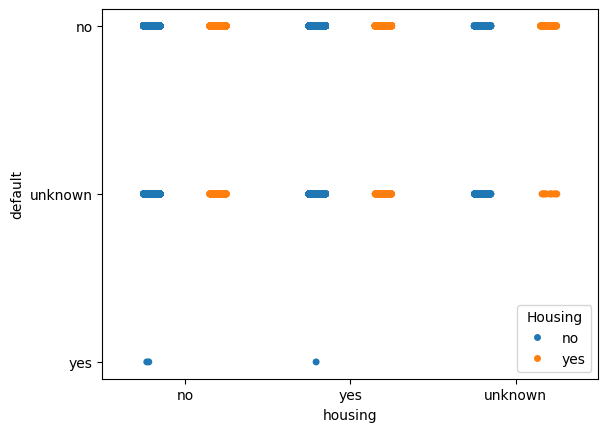

In [21]:
sns.stripplot(x="housing", y="default",
              data=df,
              hue='y',
              dodge=True, zorder=1)

plt.legend(title='Housing')
plt.show()

De acuerdo al gráfico anterior, se ve los usuarios con mora 'Default', no sucriben depósitos bancarios.

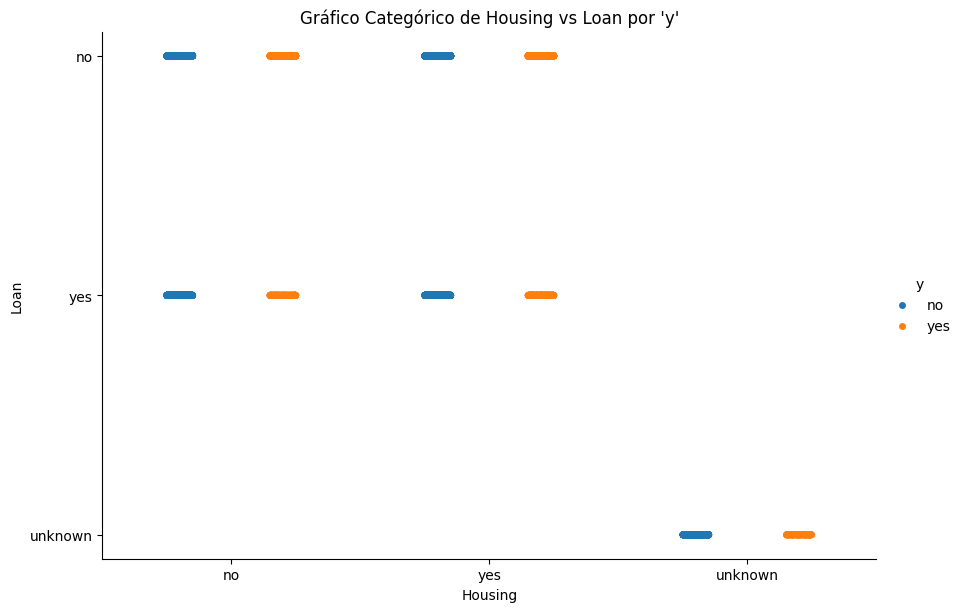

In [22]:
sns.catplot(data=df, kind="strip",
            x="housing", y="loan",
            hue='y', dodge=True,
            height=6, aspect=1.5)

plt.xlabel("Housing")
plt.ylabel("Loan")
plt.title("Gráfico Categórico de Housing vs Loan por 'y'")

plt.show()

### Sección Hipótesis 3

La influencia del tipo de comunicación de contacto ('contact'), el mes ('month') y el día de la semana ('day_of_week') en la probabilidad de suscripción se mantendrá, a pesar de la exclusión de 'duration'.

<ipython-input-23-22f1b6684f16>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axs3 = plt.subplot(212)


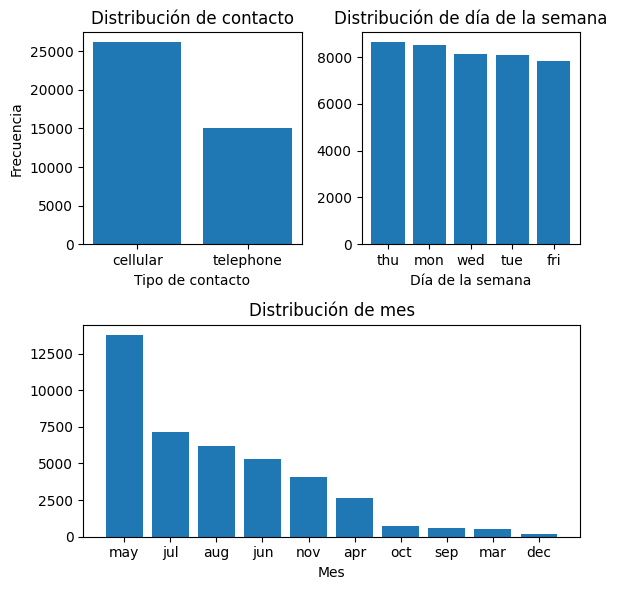

In [23]:
# Crear figura y axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

# Gráfico de contact
counts = df['contact'].value_counts()
axs1 = plt.subplot(221)
axs1.bar(counts.index, counts.values)
axs1.set_title('Distribución de contacto')
axs1.set_xlabel('Tipo de contacto')
axs1.set_ylabel('Frecuencia')

# Gráfico de day_of_week
counts = df['day_of_week'].value_counts()
axs2 = plt.subplot(222)
axs2.bar(counts.index, counts.values)
axs2.set_title('Distribución de día de la semana')
axs2.set_xlabel('Día de la semana')

# Gráfico de month
counts = df['month'].value_counts()
axs3 = plt.subplot(212)
axs3.bar(counts.index, counts.values)
axs3.set_title('Distribución de mes')
axs3.set_xlabel('Mes')

plt.tight_layout()
plt.show()

Se evidencia que en el mes de mayo, es donde más contactos de la campaña de marketing se realizan.

<ipython-input-24-32c73f176b89>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


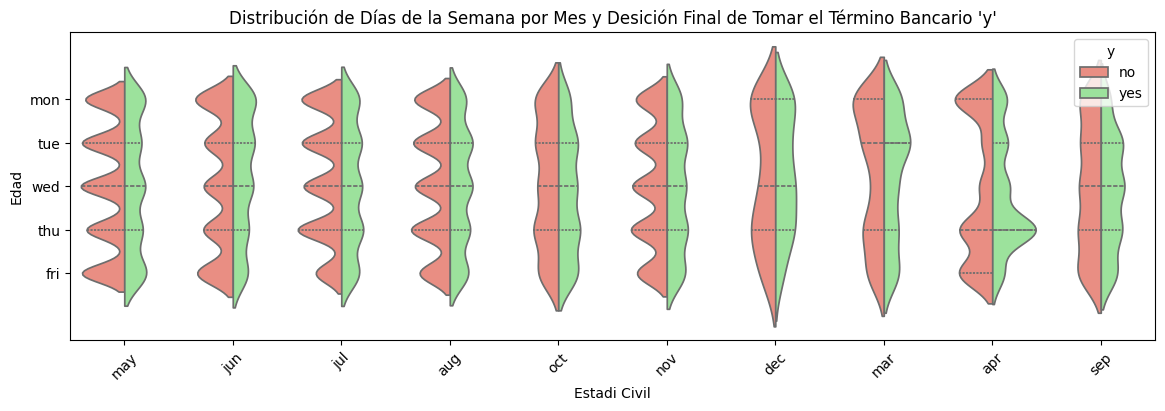

In [24]:
plt.figure(figsize=(14,4))
# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="month", y="day_of_week", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Días de la Semana por Mes y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Estadi Civil")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

Se evidencia que el mes de mayo, todas las comunicaciones resultaron en clientes que tomaron el Término Bancario. Además sí se tiene en cuenta el gráfico anterior, obtenemos un dato muy importante y es que en el mes con más contactos, se obtiene una aceptación total del término bancario.

<ipython-input-25-4001150b11bd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


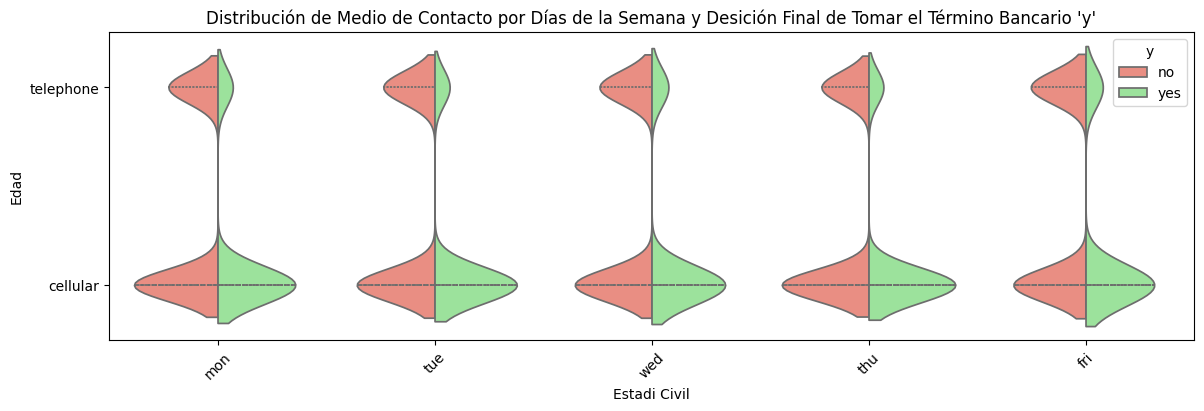

In [25]:
plt.figure(figsize=(14,4))
# Crear gráfico de violín agrupado por las 3 categóricas
ax = sns.violinplot(x="day_of_week", y="contact", hue="y", split=True, inner="quartile", palette=hue_colors, data=df)

# Cambiar el orden de las categorías
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.set_xlim(0, len(ax.get_xticklabels()))

# Título y etiquetas
ax.set_title("Distribución de Medio de Contacto por Días de la Semana y Desición Final de Tomar el Término Bancario 'y'")
ax.set_xlabel("Estadi Civil")
ax.set_ylabel("Edad")

# Mostrar gráfico
plt.show()

De acuerdo al gráfico anterior, se puede concluir que las campañas por telefono no son eficientes para obtener clientes que tomen el término bancario. Además, los días lunes tiene una aceptación total, independientemente del medio de comunicación.

### Sección Hipótesis 4

La influencia del número de días transcurridos después de que el cliente fue contactado por última vez en una campaña anterior ('pdays'), el número de contactos realizados antes de esta campaña y para este cliente ('previous') y del resultado de la campaña de marketing anterior ('poutcome') en las suscripciones actuales seguirá siendo una consideración importante.

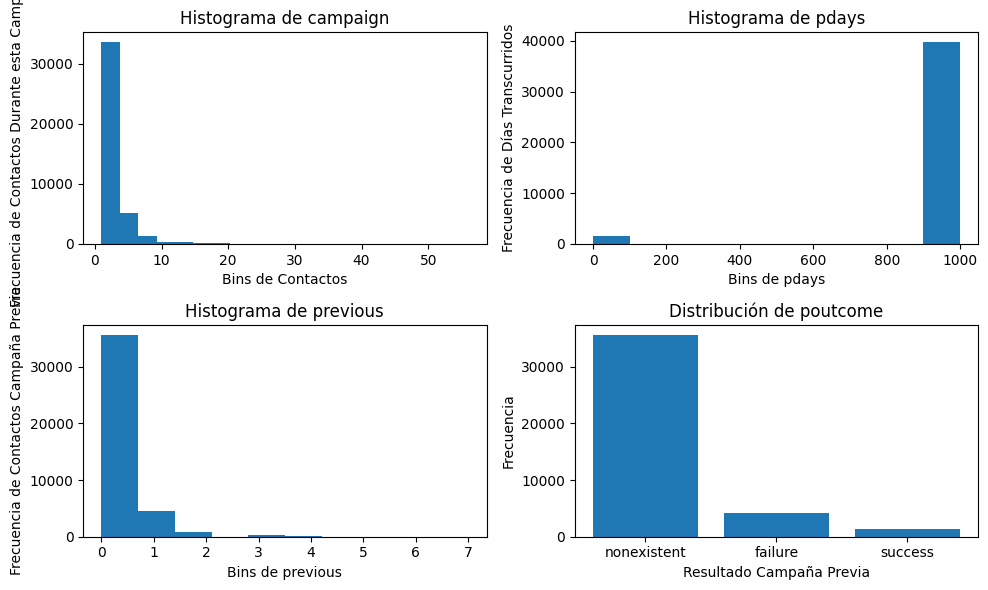

In [26]:
# Crear figura y axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Gráfico de campaign
axs1 = plt.subplot(221)
axs1.hist(df['campaign'], bins=20)
axs1.set_title('Histograma de campaign')
axs1.set_xlabel('Bins de Contactos')
axs1.set_ylabel('Frecuencia de Contactos Durante esta Campaña')

# Gráfico de day_of_week
axs2 = plt.subplot(222)
axs2.hist(df['pdays'])
axs2.set_title('Histograma de pdays')
axs2.set_xlabel('Bins de pdays')
axs2.set_ylabel('Frecuencia de Días Transcurridos')

# Gráfico de month
axs3 = plt.subplot(223)
axs3.hist(df['previous'])
axs3.set_title('Histograma de previous')
axs3.set_xlabel('Bins de previous')
axs3.set_ylabel('Frecuencia de Contactos Campaña Previa')

# Grafico de poutcome
counts = df['poutcome'].value_counts()
axs1 = plt.subplot(224)
axs1.bar(counts.index, counts.values)
axs1.set_title('Distribución de poutcome')
axs1.set_xlabel('Resultado Campaña Previa')
axs1.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

De acuerdo a la distribución de **poutcome**, se evidencia que el dataset no cuenta con suficiente información de los resultados de campañas previas, lo cual concuerda con el histograma de **pdays**, el cual tiene una disparidad fuerte en el bin que contiene el valor 999, que face referencia a que el cliente nunca fue contactado en la campaña previa.

Text(0, 0.5, 'Núm. Contactos Campaña Prev')

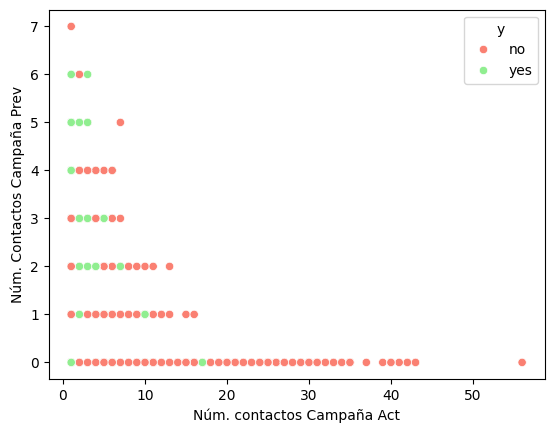

In [27]:
sns.scatterplot(data=df, x='campaign', y='previous', hue='y', palette=['salmon','lightgreen'])

plt.xlabel('Núm. contactos Campaña Act')
plt.ylabel('Núm. Contactos Campaña Prev')

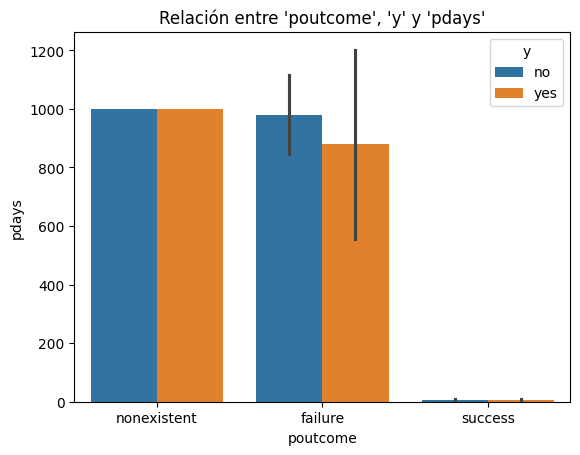

In [28]:
#sns.scatterplot(data=df, x='poutcome', y='pdays', hue='y', palette=['salmon','lightgreen'])

###plt.xlabel('Núm. contactos Campaña Act')
###plt.ylabel('Núm. Contactos Campaña Prev')

# Crear el gráfico de barras agrupadas
sns.barplot(x='poutcome', y='pdays', hue='y', data=df, errorbar='sd')
plt.xlabel('poutcome')
plt.ylabel('pdays')
plt.title("Relación entre 'poutcome', 'y' y 'pdays'")
plt.legend(title='y')
plt.show()

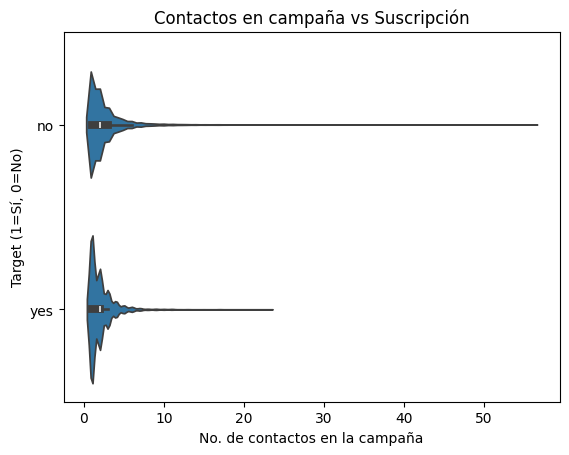

In [29]:
# Crear el gráfico de violín
sns.violinplot(x=df['campaign'], y=df['y'])
plt.xlabel('No. de contactos en la campaña')
plt.ylabel('Target (1=Sí, 0=No)')
plt.title('Contactos en campaña vs Suscripción')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='y', ylabel='previous'>

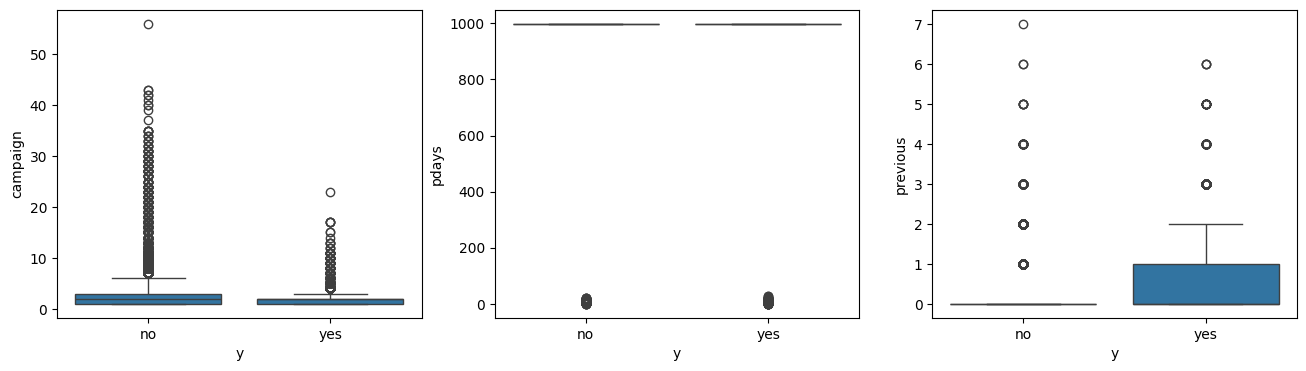

In [30]:
# Boxplots de variables numéricas por clase
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
sns.boxplot(x='y', y='campaign', data=df, ax=axs[0])
sns.boxplot(x='y', y='pdays', data=df, ax=axs[1])
sns.boxplot(x='y', y='previous', data=df, ax=axs[2])

### Sección Hipótesis 5

Se espera que los atributos relacionados con el contexto socioeconómico ('emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' y 'nr.employed') sigan influyendo en las decisiones de suscripción.

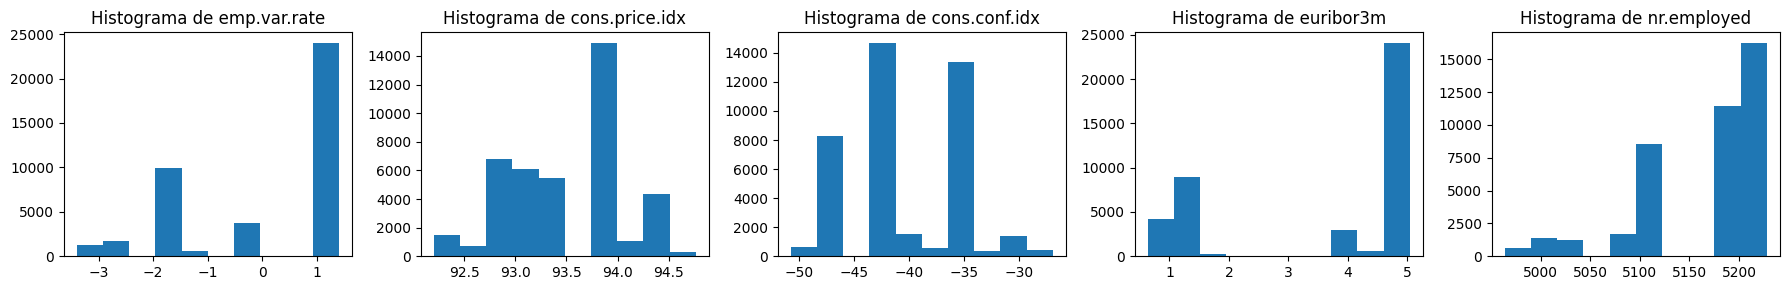

In [31]:
fig, axs = plt.subplots(1, 5, figsize=(18,3))

for i, col in enumerate(list_info_socioecon):

  # Gráfica
  axs[i].hist(df[col])
  axs[i].set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

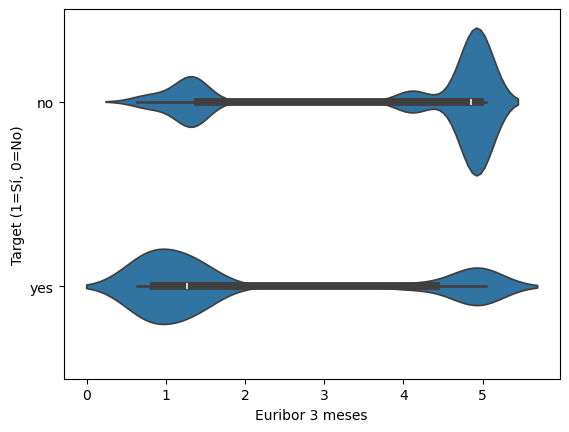

In [32]:
sns.violinplot(data=df, x='euribor3m', y='y')
plt.xlabel('Euribor 3 meses')
plt.ylabel('Target (1=Sí, 0=No)')
plt.show()

<ipython-input-33-b83c799b9324>:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


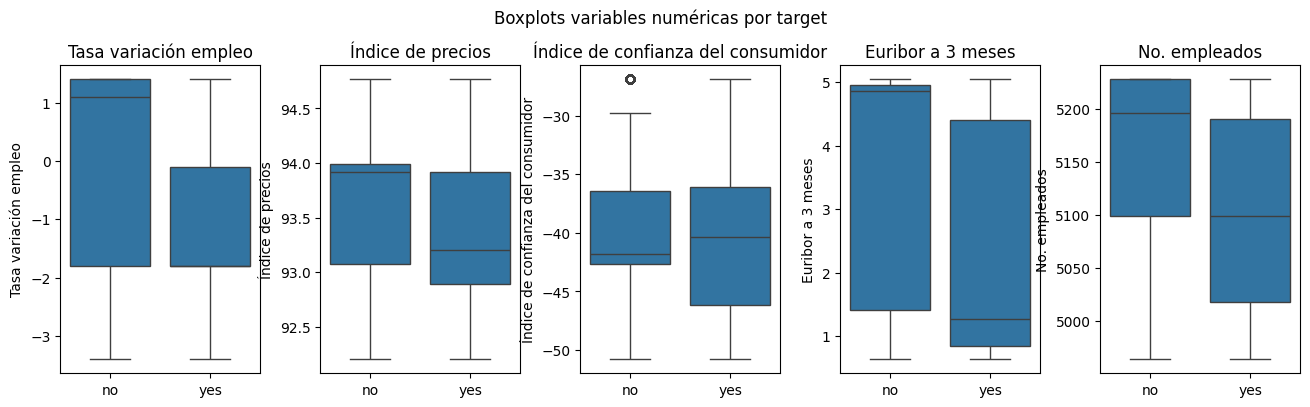

In [33]:
# Crear figura y axes
fig, axs = plt.subplots(ncols=5, figsize=(16, 4),
                        gridspec_kw={'wspace': 0.3})

# Dict para mapear nombres de columnas
col_map = {'emp.var.rate': 'Tasa variación empleo',
           'cons.price.idx': 'Índice de precios',
           'cons.conf.idx': 'Índice de confianza del consumidor',
           'euribor3m': 'Euribor a 3 meses',
           'nr.employed': 'No. empleados'}

# Iterar sobre columns y axes
for ax, col in zip(axs, col_map):

  sns.boxplot(x='y', y=col, data=df, ax=ax)

  ax.set_xlabel('')
  ax.set_ylabel(col_map[col])
  ax.set_title(col_map[col])

# Título principal
fig.suptitle('Boxplots variables numéricas por target', y=1.02)

# Ajustar espaciado externo
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Comprensión de los Datos y su Relación

no     36548
yes     4640
Name: y, dtype: int64


<Axes: >

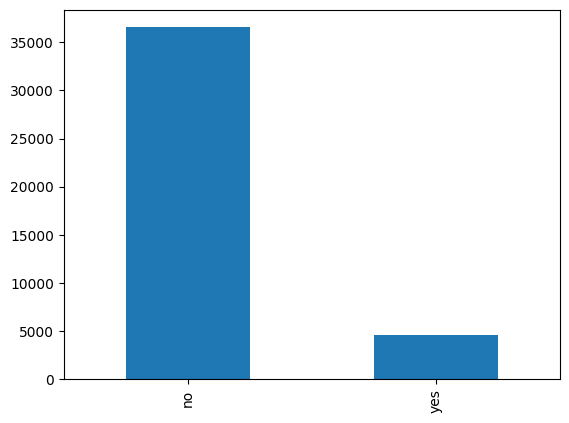

In [34]:
# Distribución de la variable objetivo
dist_var_salida = df['y'].value_counts()
print(dist_var_salida)
dist_var_salida.plot.bar()

Se evidencia que el dataset se encuentra desbalanceado, por lo que más adelante se requerirá realizar un balanceo de datos.

In [35]:
# Distribuciones de variables categóricas
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print("-------------------------------")

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-------------------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-------------------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-------------------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
-------------------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
-------------------------------
no         33950
yes

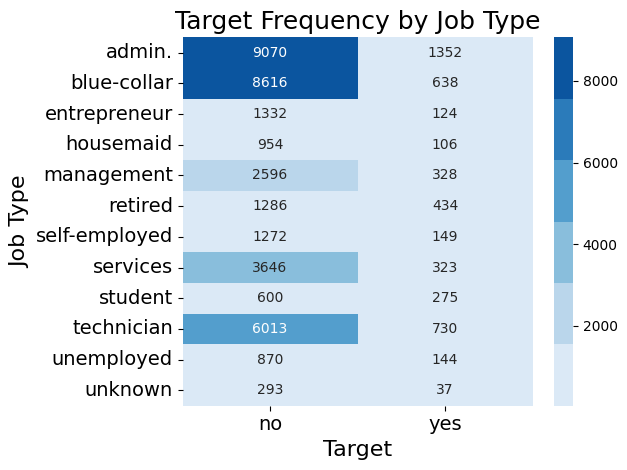

In [36]:
# Definir paleta de colores
palette = sns.color_palette('Blues')

# Generar crosstab
ct = pd.crosstab(df['job'], df['y'])

# Plot heatmap
ax = sns.heatmap(ct, annot=True, fmt='g', cmap=palette)

# Estilo de fuente para anotaciones
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=14)

# Etiquetas y título
ax.set_xlabel('Target', fontsize=16)
ax.set_ylabel('Job Type', fontsize=16)
ax.set_title('Target Frequency by Job Type', fontsize=18)

# Ajustar layout
plt.tight_layout()

<Axes: xlabel='contact', ylabel='count'>

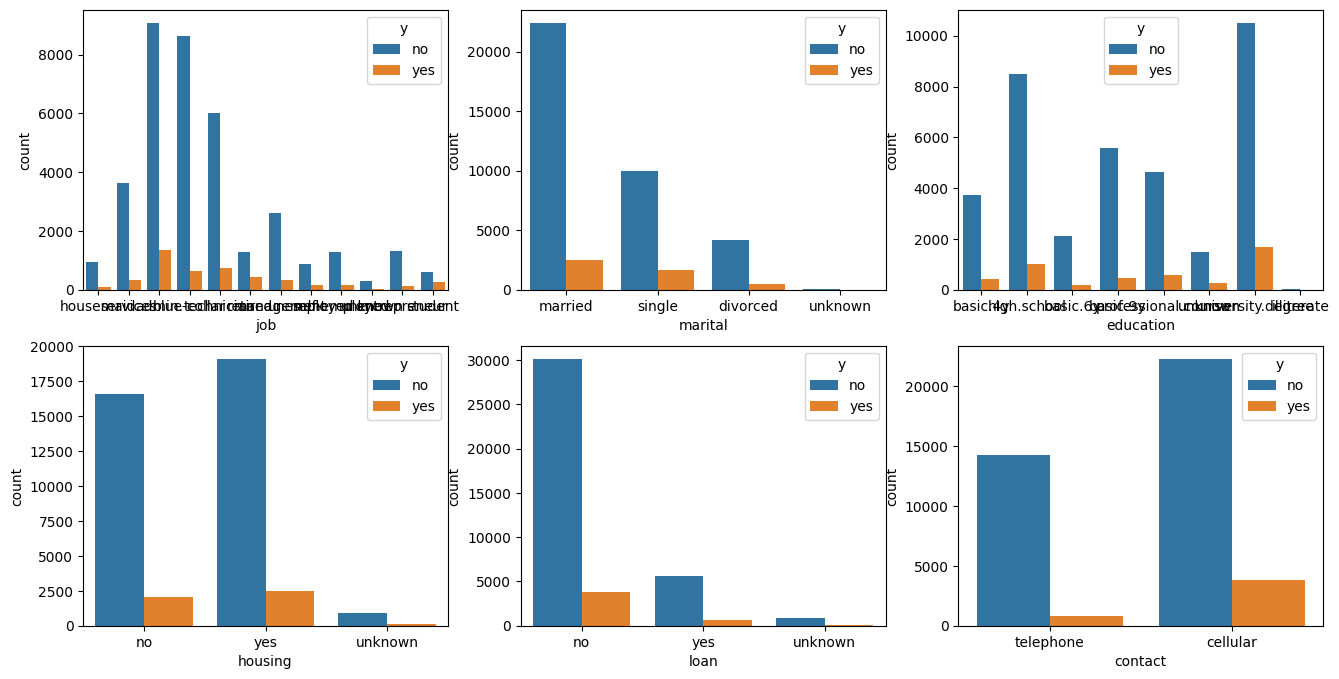

In [37]:
# Countplots de variables categóricas por clase
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
sns.countplot(x='job', hue='y', data=df, ax=axs[0,0])
sns.countplot(x='marital', hue='y', data=df, ax=axs[0,1])
sns.countplot(x='education', hue='y', data=df, ax=axs[0,2])
sns.countplot(x='housing', hue='y', data=df, ax=axs[1,0])
sns.countplot(x='loan', hue='y', data=df, ax=axs[1,1])
sns.countplot(x='contact', hue='y', data=df, ax=axs[1,2])


<ipython-input-38-26b414a81ae4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

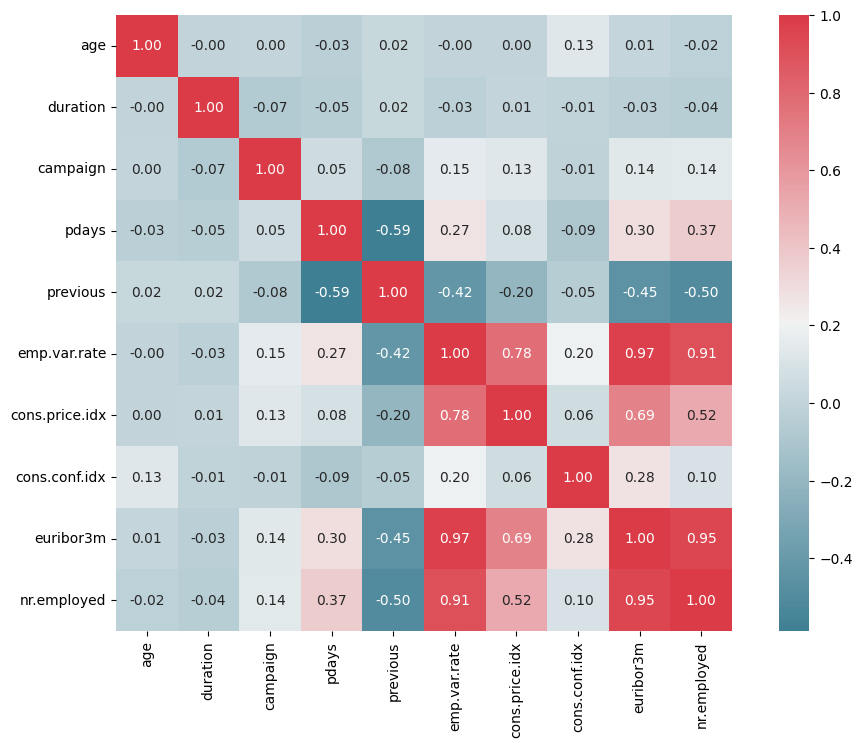

In [38]:
# Matriz de correlación
f, ax = plt.subplots(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr), annot=True, fmt=".2f",
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        square=True, ax=ax)

De acuerdo al gráfico anterior, se evidencian fuertes correlaciones entre el **euribor3m** y **nr.employed**, así como entre **euribor3m** y **emp.var.rate** y entre los campos **emp.var.rate** y **nr.employed**. Lo cual son varibales que están correlacionadas, ya que dependen de factores socioeconómicos similares.

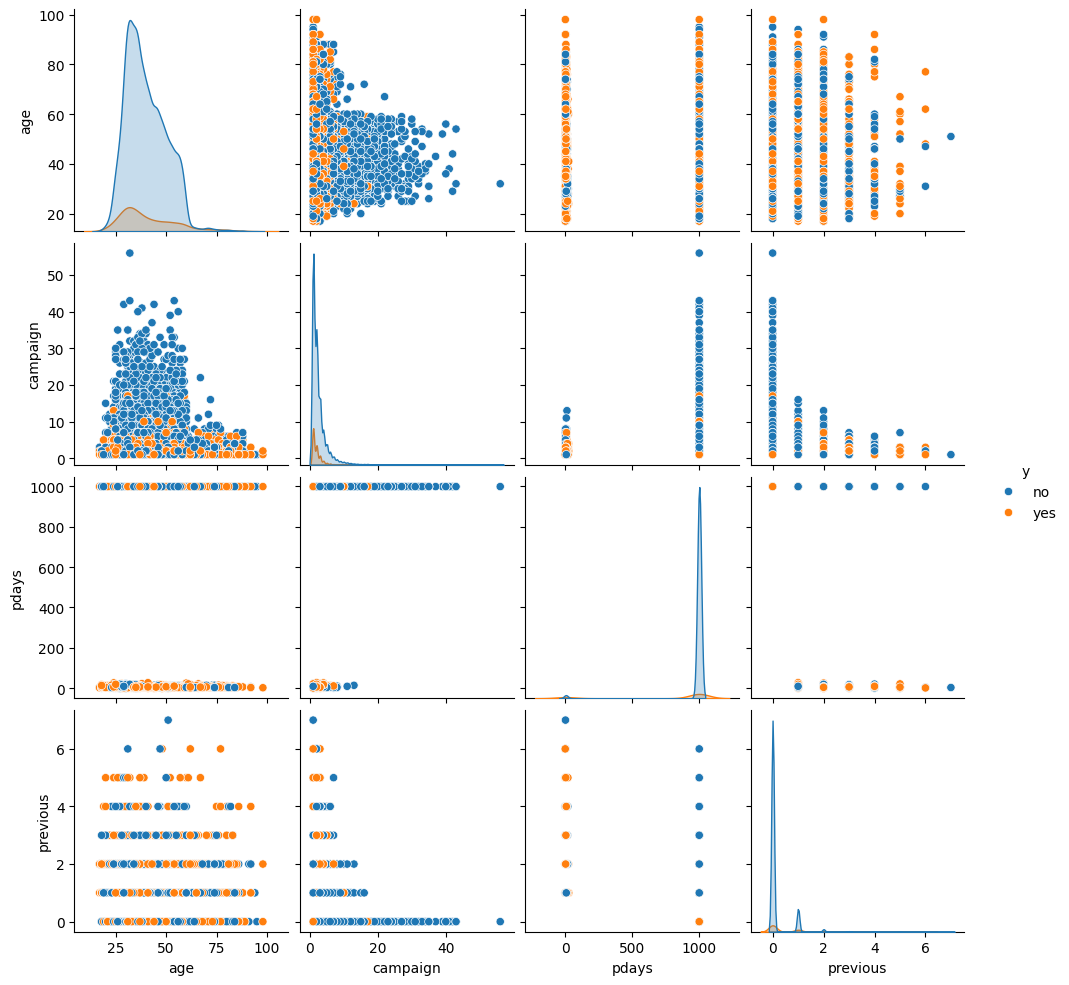

In [39]:
# Pairplots
sns.pairplot(df, hue='y', vars=['age', 'campaign', 'pdays', 'previous'])

In [40]:
'''
# Histograma y densidad de edad
plt.figure(figsize=(12,4))
sns.distplot(df[df['y']=='yes']['age'], hist=True, kde=True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(df[df['y']=='no']['age'], hist=True, kde=True,
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
'''

"\n# Histograma y densidad de edad\nplt.figure(figsize=(12,4))\nsns.distplot(df[df['y']=='yes']['age'], hist=True, kde=True,\n             bins=int(180/5), color = 'blue',\n             hist_kws={'edgecolor':'black'},\n             kde_kws={'linewidth': 4})\nsns.distplot(df[df['y']=='no']['age'], hist=True, kde=True,\n             bins=int(180/5), color = 'red',\n             hist_kws={'edgecolor':'black'},\n             kde_kws={'linewidth': 4})\n"

<Axes: xlabel='education', ylabel='campaign'>

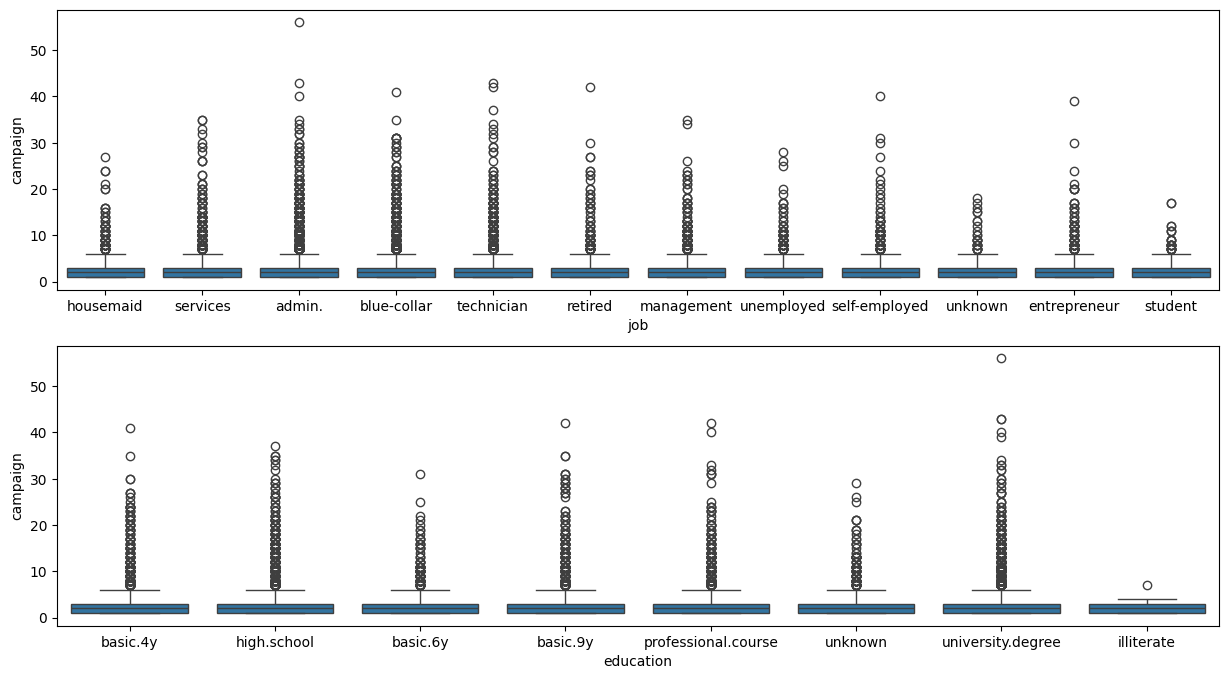

In [41]:
# Boxplots de campaign por educación y empleo
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
sns.boxplot(x='job', y='campaign', data=df, ax=ax1)
sns.boxplot(x='education', y='campaign', data=df, ax=ax2)

<Axes: xlabel='y', ylabel='campaign'>

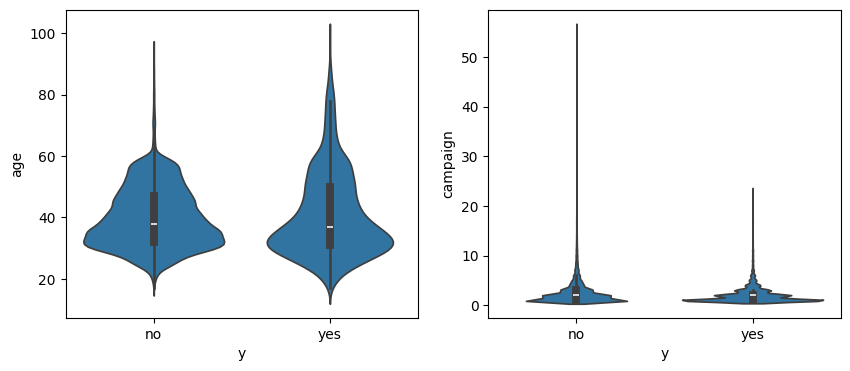

In [42]:
# Violin plots de variable objetivo vs edad y empleo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.violinplot(x='y', y='age', data=df, ax=ax1)
sns.violinplot(x='y', y='campaign', data=df, ax=ax2)

<Axes: xlabel='y', ylabel='campaign'>

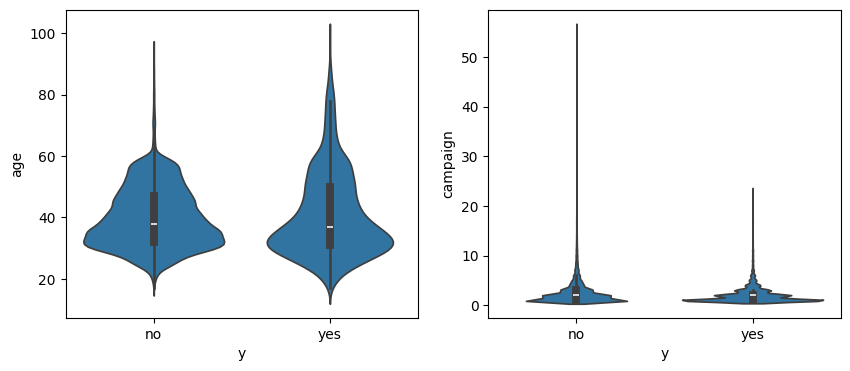

In [43]:
# Violin plots de variable objetivo vs edad y empleo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.violinplot(x='y', y='age', data=df, ax=ax1)
sns.violinplot(x='y', y='campaign', data=df, ax=ax2)

## Data Wrangling

Se procede a realizar tratamiento sobre los datos, con el fin de manejar los valores desconocidos 'unknown' (ya que este dataset no tiene valores null) y los datos atípicos (outliers).

A continuación, se muestra los valroes 'unknown' de las columnas que lo contienen:

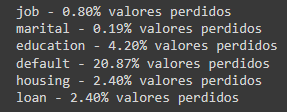

Se puede apreciar que default tiene un 20,87% de valores desconocidos, pero además, sí recordamos la distribución de las categorías de este campo, la mayoría de datos son 'no', seguidos por 'unknown' y con solo 3 registros en 'yes', por lo que praácticamente no aporta información de interés.

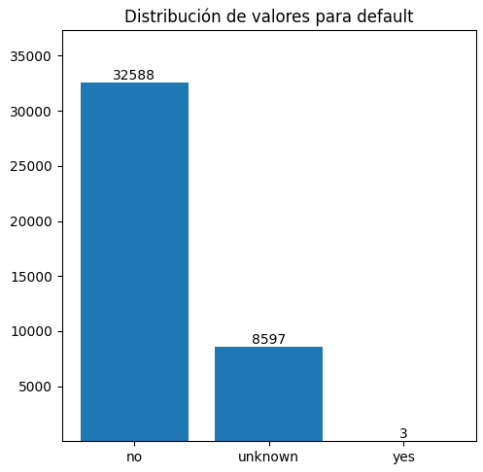

De acuerdo a lo expuesto anteriormente,se procede a eliminar la columna 'default', con el fin de tratar datos nulos y de paso eliminar una variable que no aporta información significativa al modelo.

In [44]:
df_clean = df.drop(columns=['default'])
df_clean.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
13985,28,services,married,high.school,no,no,cellular,jul,fri,64,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
18737,39,admin.,married,university.degree,yes,no,cellular,jul,thu,101,9,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
28084,32,blue-collar,married,basic.9y,no,no,cellular,apr,fri,66,2,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
27196,46,admin.,married,university.degree,yes,no,cellular,nov,fri,81,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
14968,30,admin.,single,university.degree,yes,yes,cellular,jul,wed,613,3,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no


In [45]:
# Identifica columnas con valores "unknown"
unk_cols_new = []

for col in df_clean.columns:
    if 'unknown' in df_clean[col].unique():
        unk_cols_new.append(col)

print(unk_cols_new)

['job', 'marital', 'education', 'housing', 'loan']


In [46]:
# Se calcula nuevamente el porcentaje de valores perdidos para las columnas que lo incluyen
for col in unk_cols_new:
    n_missing = df_clean[df_clean[col] == 'unknown'][col].count()
    pct_missing = n_missing / df_clean.shape[0] * 100
    print(f'{col} - {pct_missing:.2f}% valores perdidos, es decir, {n_missing} de {df_clean.shape[0]}')

job - 0.80% valores perdidos, es decir, 330 de 41188
marital - 0.19% valores perdidos, es decir, 80 de 41188
education - 4.20% valores perdidos, es decir, 1731 de 41188
housing - 2.40% valores perdidos, es decir, 990 de 41188
loan - 2.40% valores perdidos, es decir, 990 de 41188


In [47]:
# Se elimina las filas de educación, ya que es la columna categórica con mayor valor de datos
# desconocidos, pero a su vez, es inferior al 5%, con el fin de no introducir un sesgo dignificativo
## en el modelo.

# Eliminar las filas donde 'default' tenga el valor 'unknown'
df_clean = df_clean[df_clean['education'] != 'unknown']

# Mostrar el DataFrame resultante
df_clean.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
571,36,technician,married,professional.course,unknown,unknown,telephone,may,tue,155,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37962,46,admin.,married,high.school,yes,yes,cellular,sep,fri,154,3,999,0,nonexistent,-3.4,92.379,-29.8,0.803,5017.5,no
23539,32,technician,married,professional.course,yes,no,cellular,aug,thu,109,6,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
32317,35,admin.,single,university.degree,yes,no,cellular,may,fri,662,1,12,1,success,-1.8,92.893,-46.2,1.313,5099.1,yes
40418,59,retired,married,professional.course,no,no,cellular,aug,fri,218,3,3,1,success,-1.7,94.027,-38.3,0.905,4991.6,yes


In [48]:
# Se calcula nuevamente el porcentaje de valores perdidos para las columnas que lo incluyen
for col in unk_cols_new:
    n_missing = df_clean[df_clean[col] == 'unknown'][col].count()
    pct_missing = n_missing / df_clean.shape[0] * 100
    print(f'{col} - {pct_missing:.2f}% valores perdidos, es decir, {n_missing} de {df_clean.shape[0]}')

job - 0.50% valores perdidos, es decir, 199 de 39457
marital - 0.18% valores perdidos, es decir, 71 de 39457
education - 0.00% valores perdidos, es decir, 0 de 39457
housing - 2.41% valores perdidos, es decir, 950 de 39457
loan - 2.41% valores perdidos, es decir, 950 de 39457


In [49]:
# Eliminar las filas donde 'housing' tenga el valor 'unknown'
df_clean = df_clean[df_clean['housing'] != 'unknown']

# Mostrar el DataFrame resultante
df_clean.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
15012,26,services,single,high.school,no,yes,cellular,jul,thu,126,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
30332,40,technician,married,professional.course,yes,no,cellular,apr,thu,580,2,2,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
37441,28,student,single,high.school,yes,no,cellular,aug,wed,188,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,no
23229,54,admin.,married,high.school,no,no,cellular,aug,tue,84,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
12773,29,entrepreneur,married,university.degree,no,no,telephone,jul,tue,208,5,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [50]:
# Se calcula nuevamente el porcentaje de valores perdidos para las columnas que lo incluyen
for col in unk_cols_new:
    n_missing = df_clean[df_clean[col] == 'unknown'][col].count()
    pct_missing = n_missing / df_clean.shape[0] * 100
    print(f'{col} - {pct_missing:.2f}% valores perdidos, es decir, {n_missing} de {df_clean.shape[0]}')

job - 0.51% valores perdidos, es decir, 196 de 38507
marital - 0.18% valores perdidos, es decir, 70 de 38507
education - 0.00% valores perdidos, es decir, 0 de 38507
housing - 0.00% valores perdidos, es decir, 0 de 38507
loan - 0.00% valores perdidos, es decir, 0 de 38507


Con la eliminación delos valores desconocidos de 'housing', se eliminan los valores dnulos de este campo, pero además, se eliminan los nulos del campo 'loan'

In [51]:
# Eliminar las filas donde 'housing' tenga el valor 'unknown'
df_clean = df_clean[df_clean['job'] != 'unknown']

# Mostrar el DataFrame resultante
df_clean.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
504,39,services,married,high.school,yes,no,telephone,may,tue,918,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
13600,30,blue-collar,single,basic.9y,yes,no,cellular,jul,thu,45,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
20902,34,admin.,single,university.degree,no,no,cellular,aug,thu,260,6,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
17865,48,blue-collar,married,basic.6y,yes,no,cellular,jul,tue,63,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
33208,33,services,married,high.school,yes,no,cellular,may,tue,223,1,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,no


In [52]:
# Se calcula nuevamente el porcentaje de valores perdidos para las columnas que lo incluyen
for col in unk_cols_new:
    n_missing = df_clean[df_clean[col] == 'unknown'][col].count()
    pct_missing = n_missing / df_clean.shape[0] * 100
    print(f'{col} - {pct_missing:.2f}% valores perdidos, es decir, {n_missing} de {df_clean.shape[0]}')

job - 0.00% valores perdidos, es decir, 0 de 38311
marital - 0.17% valores perdidos, es decir, 66 de 38311
education - 0.00% valores perdidos, es decir, 0 de 38311
housing - 0.00% valores perdidos, es decir, 0 de 38311
loan - 0.00% valores perdidos, es decir, 0 de 38311


In [53]:
# Eliminar las filas donde 'housing' tenga el valor 'unknown'
df_clean = df_clean[df_clean['marital'] != 'unknown']

# Mostrar el DataFrame resultante
df_clean.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
530,36,admin.,married,high.school,no,no,telephone,may,tue,342,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4257,37,admin.,married,high.school,yes,yes,telephone,may,tue,196,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
7429,33,admin.,married,high.school,no,no,telephone,may,fri,283,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
9676,53,blue-collar,single,basic.9y,yes,no,telephone,jun,mon,91,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
1682,39,admin.,married,university.degree,yes,no,telephone,may,fri,238,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [54]:
# Se calcula nuevamente el porcentaje de valores perdidos para las columnas que lo incluyen
for col in unk_cols_new:
    n_missing = df_clean[df_clean[col] == 'unknown'][col].count()
    pct_missing = n_missing / df_clean.shape[0] * 100
    print(f'{col} - {pct_missing:.2f}% valores perdidos, es decir, {n_missing} de {df_clean.shape[0]}')

job - 0.00% valores perdidos, es decir, 0 de 38245
marital - 0.00% valores perdidos, es decir, 0 de 38245
education - 0.00% valores perdidos, es decir, 0 de 38245
housing - 0.00% valores perdidos, es decir, 0 de 38245
loan - 0.00% valores perdidos, es decir, 0 de 38245


Se eliminaron todos los valores desconocidos 'unknown' del dataframe.

In [55]:
# Cálculo de los valores eliminados, en comparación con el dataframe inicial.

initial_rows = df.shape[0]
deleted_rows = initial_rows - df_clean.shape[0]

p_deleted_rows = (deleted_rows/initial_rows) * 100
print(f'El porcentaje de filas eliminadas es de {p_deleted_rows:.2f}%, que corresponde a {deleted_rows} de {initial_rows}, generando un df de {initial_rows-deleted_rows}')

El porcentaje de filas eliminadas es de 7.15%, que corresponde a 2943 de 41188, generando un df de 38245


Aunque la eliminación de casi 3000 filas puede agregar un pequeño sesgo al modelo, sus ventajas son mayores al tener datos que aportan información valiosa y no solo incertidumbre, como pasaba con los valores 'unknown'.

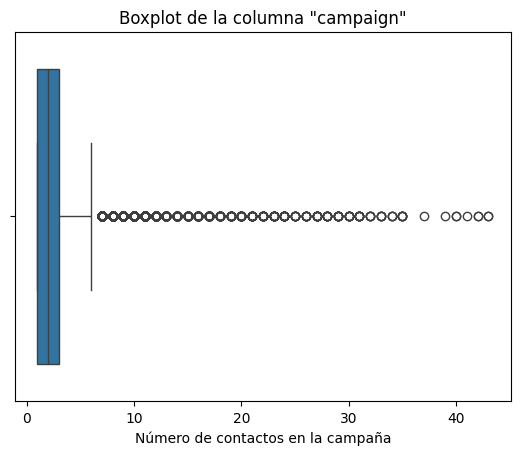

In [56]:
# Crear el boxplot de campaign
sns.boxplot(x=df_clean['campaign'])

# Añadir etiquetas y título
plt.xlabel('Número de contactos en la campaña')
plt.title('Boxplot de la columna "campaign"')

# Mostrar el gráfico
plt.show()

In [57]:
# Contar la cantidad de datos mayores a 3 en la columna 'campaign'
cantidad_mayores_a_3 = (df_clean['campaign'] > 3).sum()

# Imprimir el resultado
print("Cantidad de datos en 'campaign' mayores a 3:", cantidad_mayores_a_3)

Cantidad de datos en 'campaign' mayores a 3: 7096


In [58]:
# Calcula la mediana, Q1, Q3 e IQR
median_campaign = df_clean['campaign'].median()
q1_campaign = df_clean['campaign'].quantile(0.25)
q3_campaign = df_clean['campaign'].quantile(0.75)
iqr_campaign = q3_campaign - q1_campaign

# Imprime los resultados
print("Mediana de 'campaign':", median_campaign)
print("Q1 de 'campaign':", q1_campaign)
print("Q3 de 'campaign':", q3_campaign)
print("IQR de 'campaign':", iqr_campaign)

Mediana de 'campaign': 2.0
Q1 de 'campaign': 1.0
Q3 de 'campaign': 3.0
IQR de 'campaign': 2.0


In [59]:
# Establecer el límite máximo del Boxplot
lim_max = q3_campaign + (1.5*iqr_campaign)
lim_max

6.0

Dado que hay muchos outliers en la coumna 'campaign', se ha decidido crear una clasificación que agurpe los datos mayores al límite máximo del Boxplot (Q3 ¿ 1.5*IQR), por ende todos los valore de campaign que sean mayores a 6, tendran un valor de 6 en la nueva columna 'grouped_campaign'

In [60]:
# Creamos la nueva columna 'nueva_campaign' aplicando la condición
df_clean['grouped_campaign'] = df_clean['campaign'].apply(lambda x: min(x, lim_max))

df_clean2 = df_clean.drop(columns=['campaign'])

# Imprimir el DataFrame con la nueva columna
df_clean2.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,grouped_campaign
3810,33,management,single,university.degree,no,yes,telephone,may,fri,71,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,6.0
7946,54,management,married,university.degree,no,yes,telephone,jun,mon,140,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,4.0
18763,54,services,married,basic.6y,yes,no,cellular,jul,thu,86,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,4.0
17988,30,entrepreneur,single,university.degree,no,no,telephone,jul,tue,254,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,6.0
36809,36,self-employed,single,university.degree,no,no,cellular,jun,mon,177,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,yes,1.0


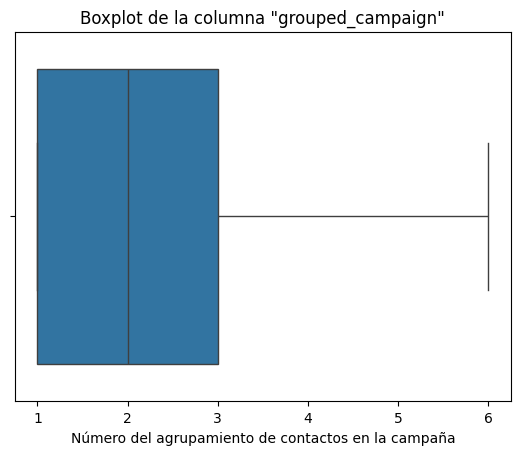

In [61]:
# Crear el boxplot de campaign
sns.boxplot(x=df_clean2['grouped_campaign'])

# Añadir etiquetas y título
plt.xlabel('Número del agrupamiento de contactos en la campaña')
plt.title('Boxplot de la columna "grouped_campaign"')

# Mostrar el gráfico
plt.show()

Otro campo que tiene muchos Outliers, es la edad, así que vamos a aplicar un enfoque similar al anterior, con la deifrencia que se generaran grupos con intervalos iguales.

In [62]:
num_bins = 10
# Crea bins (grupos) con abse a la columna 'age' con anchos iguales.
df_clean2['grouped_age'] = pd.cut(df_clean2['age'], bins=num_bins, labels=[f'group {i+1}' for i in range(num_bins)])

df_clean3 = df_clean2.drop(columns=['age'])

df_clean3['grouped_age'].value_counts()

group 3     11313
group 2     10756
group 4      7445
group 5      5285
group 1      1484
group 6      1422
group 7       281
group 8       172
group 9        81
group 10        6
Name: grouped_age, dtype: int64

In [63]:
df_clean3.sample(5)

,job,marital,education,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,grouped_campaign,grouped_age
29823,admin.,single,university.degree,no,yes,cellular,apr,mon,120,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes,1.0,group 1
31563,blue-collar,married,basic.9y,no,no,cellular,may,thu,98,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no,1.0,group 5
12752,admin.,divorced,high.school,yes,no,telephone,jul,tue,58,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,2.0,group 2
2059,management,divorced,university.degree,no,no,telephone,may,mon,288,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2.0,group 5
4164,services,married,high.school,yes,no,telephone,may,mon,967,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,yes,6.0,group 5


Lo anterior permite convertir la edad en un dato categórico, lo cual ya no puede ser un dato númerico y no puede tener valores atípicos. Además favorece el uso de One Hot Encoding

## Feature Engineering

Selección de las variables a utilizar para desarrollar el modelo.

Lo primero que se hace es eliminar la columna 'duration', con el fin de hacer el modelo más realista, en el cual no su dataset no conoce la duración de la llamada, el cual es un dato futurno y además se recomienda en el diccionario de datos del dataset.

In [64]:
df_sel = df_clean3.drop(columns=['duration'])
df_sel.sample(5)

,job,marital,education,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,grouped_campaign,grouped_age
19742,technician,single,professional.course,no,no,cellular,aug,fri,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,1.0,group 2
13083,unemployed,divorced,professional.course,yes,no,cellular,jul,tue,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,4.0,group 5
25080,admin.,divorced,university.degree,no,no,cellular,nov,tue,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,2.0,group 3
31310,services,married,high.school,yes,no,cellular,may,wed,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,2.0,group 2
28471,services,single,high.school,yes,no,cellular,apr,tue,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,yes,2.0,group 1


Otro paso, es eliminar los datos que tienen una alta correlación, indicado en el gráfico de correlación. Para este caso, se van a liminar los datos con una correlación mayor a 0.9.

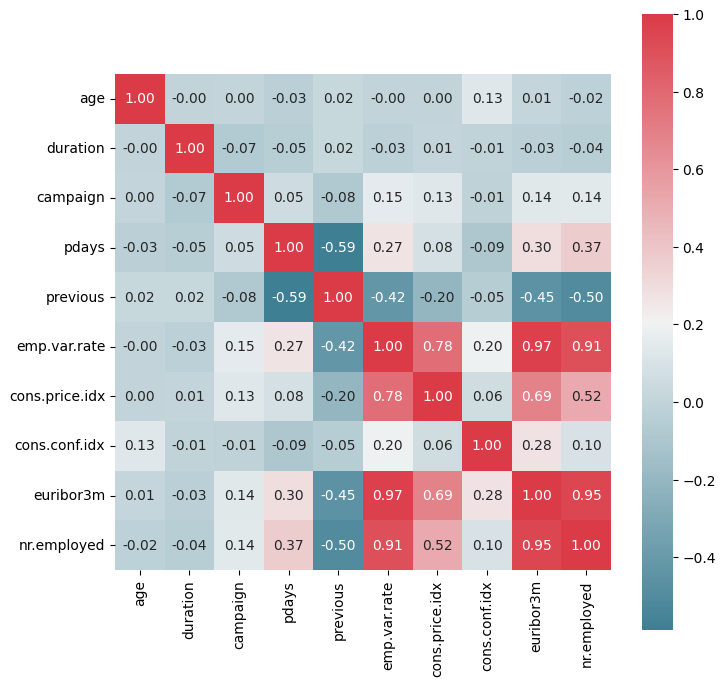

De acuerdo a lo anterior, se evidencia una correlación fuerte entre 'emp_var_rate', 'euribor3m' y 'nr.employed'. Por lo tanto se ha decidido eliminar las columnas: 'emp.var.rate' y 'nr.employed', ya que tienen la correlación más alta con la columna 'euribor3m'.

In [65]:
df_sel2 = df_sel.drop(columns=['emp.var.rate', 'nr.employed'])

df_sel2.sample(5)

,job,marital,education,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y,grouped_campaign,grouped_age
6619,blue-collar,married,basic.9y,no,no,telephone,may,wed,999,0,nonexistent,93.994,-36.4,4.857,no,6.0,group 4
24782,blue-collar,married,professional.course,yes,yes,cellular,nov,tue,999,1,failure,93.200,-42.0,4.153,no,1.0,group 3
38119,retired,divorced,professional.course,yes,no,cellular,sep,thu,999,2,failure,92.379,-29.8,0.743,no,1.0,group 6
29126,blue-collar,married,basic.9y,no,no,cellular,apr,fri,999,1,failure,93.075,-47.1,1.405,yes,3.0,group 3
31979,student,single,basic.9y,yes,yes,cellular,may,thu,999,0,nonexistent,92.893,-46.2,1.327,no,3.0,group 3


### Label Encoding

Seguidamente se procede a realizar el encoding de los datos, para lo cual se va a plicar One Hot Encoding para la mayoría de columnas categóricas y Label Encoding, para los datos que tengan un orden implícito, como 'y', 'education', 'hosuing' y 'loan'.

In [66]:
# Label Encoding
label_encoder = LabelEncoder()
df_sel2['education'] = label_encoder.fit_transform(df_sel2['education'])
df_sel2['housing'] = label_encoder.fit_transform(df_sel2['housing'])
df_sel2['loan'] = label_encoder.fit_transform(df_sel2['loan'])
df_sel2['y'] = label_encoder.fit_transform(df_sel2['y'])

In [67]:
df_sel2.sample(5)

,job,marital,education,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y,grouped_campaign,grouped_age
8810,self-employed,married,6,1,0,telephone,jun,thu,999,0,nonexistent,94.465,-41.8,4.866,0,1.0,group 2
14736,student,married,6,1,0,cellular,jul,wed,999,0,nonexistent,93.918,-42.7,4.957,0,6.0,group 2
4451,services,married,3,0,1,telephone,may,tue,999,0,nonexistent,93.994,-36.4,4.856,0,1.0,group 3
15992,admin.,single,3,0,0,cellular,jul,tue,999,0,nonexistent,93.918,-42.7,4.961,0,6.0,group 2
8031,admin.,divorced,6,0,0,telephone,jun,mon,999,0,nonexistent,94.465,-41.8,4.865,0,1.0,group 4


Dado que el dataset está desbalanceado, es decir, es mayor la cantidad de datos de la columna 'y' es el dato 'no' y 'yes' es mucho más pequeño. Aprovechando que la columna 'y' tiene el encoding, vamos a proceder a balancear el dataset.

0    33987
1     4258
Name: y, dtype: int64


<Axes: >

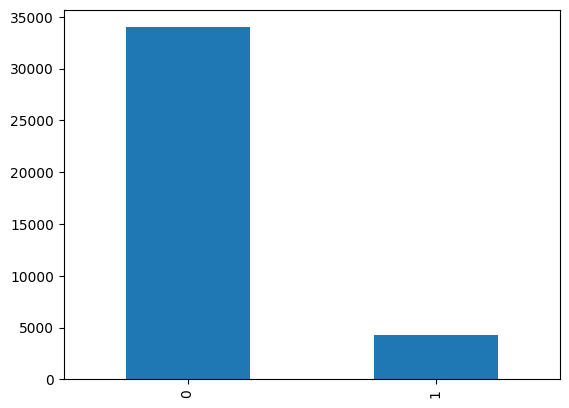

In [68]:
# Distribución de la variable objetivo
dist_var_salida2 = df_sel2['y'].value_counts()
print(dist_var_salida2)
dist_var_salida2.plot.bar()

Label encoding ha asignado 0 a 'no' y 1 a 'yes'

### Balanceo del Dataset

A continuación,se balancea el dataset, es decir, se iguala la cantidad de registros con salidas 'y' con valor de 1 (si), con los registros con salidas de 0 (no).

In [69]:
# Crea 2 diferentes Dataframe, uno para la clase mayoritaria (0) y otro para la minoritaria (1)
df_majority = df_sel2[(df_sel2['y']==0)]
df_minority = df_sel2[(df_sel2['y']==1)]

# Número de muestras
n_samples = (df_sel2['y'] == 0).value_counts()[0]

# Oversampling de la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # muestra con sustitución
                                 n_samples= n_samples, # para que coincida con la clase mayoritaria
                                 random_state=14)  # Resultados reproducibles

# Combina la clase mayoritaria con el oversampling de la clase minoritaria
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [70]:
re_sample = df_upsampled['y'].value_counts()

<Axes: ylabel='count'>

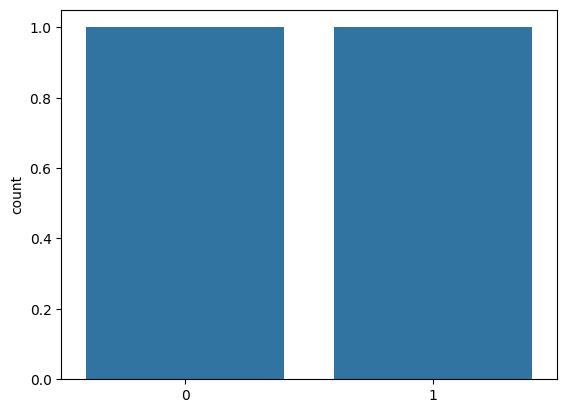

In [71]:
sns.countplot(re_sample)

### One Hot encoding

In [72]:
# One Hot Encoding
categorical_cols = ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome', 'grouped_age']

# Inicializa OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplica one-hot encoding a categorical_cols
one_hot_encoded = encoder.fit_transform(df_upsampled[categorical_cols])

# Crea un DataFrame con las columnas encodeadas
# Se usa get_feature_names_out() para obtener el nombre de las columnas de los datos encodeados
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Restablece el índice de df_upsampled para evitar duplicados en el índice
df_upsampled.reset_index(drop=True, inplace=True)

# Concatena el one-hot encoded dataframe con el dataframe original
df_encoded = pd.concat([df_upsampled, one_hot_df], axis=1)

# Elimina las columnas originales
df_encoded = df_encoded.drop(categorical_cols, axis=1)

# Muestra las primeras 5 filas del DataFrame
print(df_encoded.head(5))


   education  housing  loan  pdays  previous  cons.price.idx  cons.conf.idx  \
0          2        0     0    999         0          92.201          -31.4   
1          5        1     0     10         1          92.843          -50.0   
2          6        1     0      3         1          92.963          -40.8   
3          6        1     0      6         2          94.215          -40.3   
4          6        1     1    999         0          93.200          -42.0   

   euribor3m  y  grouped_campaign  ...  grouped_age_group 1  \
0      0.879  1               1.0  ...                  0.0   
1      1.726  1               2.0  ...                  0.0   
2      1.268  1               2.0  ...                  0.0   
3      0.884  1               2.0  ...                  0.0   
4      4.021  1               1.0  ...                  0.0   

   grouped_age_group 10  grouped_age_group 2  grouped_age_group 3  \
0                   0.0                  1.0                  0.0   
1       

In [73]:
df_encoded.sample(5)

,education,housing,loan,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,grouped_campaign,...,grouped_age_group 1,grouped_age_group 10,grouped_age_group 2,grouped_age_group 3,grouped_age_group 4,grouped_age_group 5,grouped_age_group 6,grouped_age_group 7,grouped_age_group 8,grouped_age_group 9
36224,0,0,0,999,0,93.994,-36.4,4.856,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7959,5,1,0,999,2,92.893,-46.2,1.334,1,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39260,2,0,0,999,0,93.994,-36.4,4.857,0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8073,2,0,0,999,0,93.444,-36.1,4.965,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19105,2,0,0,999,0,93.444,-36.1,4.967,1,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df_encoded.shape

(67974, 54)

In [75]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67974 entries, 0 to 67973
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education             67974 non-null  int64  
 1   housing               67974 non-null  int64  
 2   loan                  67974 non-null  int64  
 3   pdays                 67974 non-null  int64  
 4   previous              67974 non-null  int64  
 5   cons.price.idx        67974 non-null  float64
 6   cons.conf.idx         67974 non-null  float64
 7   euribor3m             67974 non-null  float64
 8   y                     67974 non-null  int64  
 9   grouped_campaign      67974 non-null  float64
 10  job_admin.            67974 non-null  float64
 11  job_blue-collar       67974 non-null  float64
 12  job_entrepreneur      67974 non-null  float64
 13  job_housemaid         67974 non-null  float64
 14  job_management        67974 non-null  float64
 15  job_retired        

### Normalización de los datos

Permite establecer los valores estén entre 0 y 1.

In [76]:
# Normalización de los datos
scaler_minmax = MinMaxScaler()
scaled_data_minmax = scaler_minmax.fit_transform(df_encoded)

column_names = df_encoded.columns  # Las mismas etiquetas de columna que en tu DataFrame original

# Convierte scaled_data_minmax a DataFrame
df_scaled = pd.DataFrame(scaled_data_minmax, columns=column_names)

df_scaled.sample(5)

,education,housing,loan,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,grouped_campaign,...,grouped_age_group 1,grouped_age_group 10,grouped_age_group 2,grouped_age_group 3,grouped_age_group 4,grouped_age_group 5,grouped_age_group 6,grouped_age_group 7,grouped_age_group 8,grouped_age_group 9
35806,0.000000,0.0,0.0,1.000000,0.000000,0.698753,0.602510,0.957379,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12233,0.000000,0.0,0.0,1.000000,0.000000,0.669135,0.338912,0.980050,1.0,0.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27256,1.000000,1.0,0.0,0.005005,0.142857,0.340608,0.154812,0.165722,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65381,0.333333,1.0,0.0,1.000000,0.142857,0.269680,0.192469,0.143278,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23334,0.500000,1.0,0.0,0.006006,0.142857,0.603274,0.677824,0.005668,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Optimización del Dataset

Uso de PCA para usar solo las columnas que más influyen en en la salida 'y'

In [77]:
# Inicializa PCA sin especificar el número de componentes principales
pca = PCA()

# Ajusta PCA a tus datos escalados
principal_components = pca.fit_transform(df_scaled)

# Calcula la varianza explicada de cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Crea un DataFrame para la varianza explicada de cada componente principal
variance_df = pd.DataFrame(data=explained_variance_ratio, columns=['Explained Variance Ratio'])

# Agrega nombres de columna como índice en el DataFrame
variance_df.index = ['PC{}'.format(i+1) for i in range(len(explained_variance_ratio))]

# Ordena los componentes principales por su varianza explicada
variance_df_sorted = variance_df.sort_values(by='Explained Variance Ratio', ascending=False)

# Calcula la suma acumulativa de la varianza explicada
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Encuentra el número óptimo de componentes principales que explican una cantidad significativa de varianza
optimal_num_components = len(cumulative_explained_variance[cumulative_explained_variance <= 0.95])

# Selecciona las columnas más representativas basadas en el número óptimo de componentes principales
most_representative_columns = df_scaled.columns[:optimal_num_components]

# Imprime las columnas más representativas y su varianza explicada acumulativa
print("Columnas más representativas:")
print(most_representative_columns)
print("\nVarianza explicada acumulativa:")
print(cumulative_explained_variance[:optimal_num_components])

Columnas más representativas:
Index(['education', 'housing', 'loan', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y', 'grouped_campaign', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun'],
      dtype='object')

Varianza explicada acumulativa:
[0.11704672 0.19595128 0.25444638 0.30135571 0.34668467 0.38916148
 0.42897811 0.46588397 0.50165521 0.53703308 0.57109785 0.60484593
 0.63732272 0.66913538 0.69578269 0.72158398 0.74715426 0.76954461
 0.79091835 0.81150864 0.83081025 0.84876484 0.86449573 0.87902734
 0.89283081 0.9059035  0.91646637 0.92577834 0.93432554 0.94222766
 0.94896015]


### Preparación del dataset para los modelos de machine Learning

In [78]:
# Crea un nuevo DataFrame utilizando solo las columnas más representativas seleccionadas por PCA
new_df = df_scaled[most_representative_columns].copy()

In [79]:
new_df.sample(5)

,education,housing,loan,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,grouped_campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun
41992,1.0,0.0,0.0,1.0,0.0,0.882307,0.376569,0.959420,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
66911,1.0,0.0,1.0,1.0,0.0,0.174591,0.866109,0.018363,0.0,0.6,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39594,1.0,1.0,0.0,1.0,0.0,0.698753,0.602510,0.957379,0.0,0.8,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27796,0.0,1.0,0.0,1.0,0.0,0.698753,0.602510,0.957153,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4230,0.5,0.0,0.0,1.0,0.0,0.622369,0.435146,0.989798,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [80]:
new_df.shape

(67974, 31)

In [81]:
# Separar las columnas de entrada 'x' (todas las columnas excepto 'y')
x = new_df.copy().drop(columns=['y'])

# El dato de salida 'y' contienen solo la columna 'y'
y = new_df['y'].copy()

In [82]:
# Generar los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

### Modelo 1 - LightGBM con PCA

Modelo LightGBM con dataset que tiene las columnas seleccionadas por el modelo PCA.

In [83]:
# Entrenar modelo LightGBM
lgbm = LGBMClassifier(random_state=14)
lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 27168, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 54379, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499605 -> initscore=-0.001581
[LightGBM] [Info] Start training from score -0.001581


LGBMClassifier(random_state=14)

In [84]:
# Evaluar modelo
y_pred = lgbm.predict(x_test)
y_prob = lgbm.predict_proba(x_test)[:, 1]  # Obtener probabilidades de la clase positiva

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Matriz de Confusión:\n', conf_matrix)
print(f'Accuracy: {100*accuracy:.2f}%')
print(f'Recall: {100*recall:.2f}%')
print(f'F1-Score: {100*f1:.2f}%')

Matriz de Confusión:
 [[5852  924]
 [2211 4608]]
Accuracy: 76.94%
Recall: 67.58%
F1-Score: 74.62%


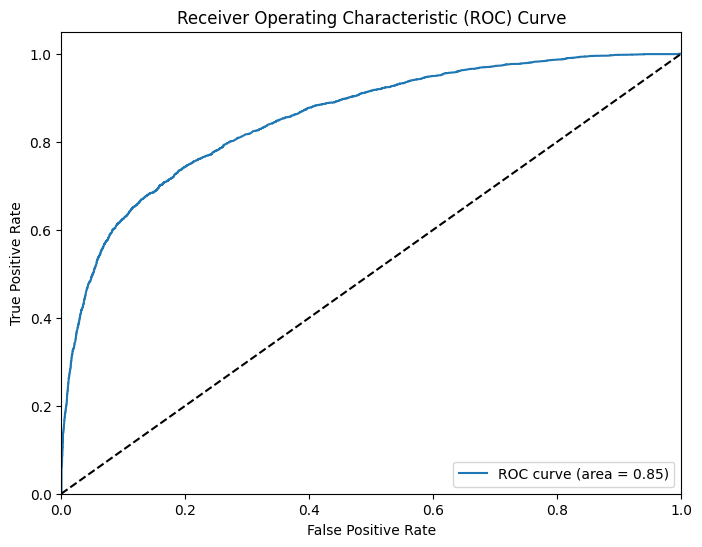

In [85]:
# Calcular y graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Modelo 2 - LightGBM sin PCA

Modelo LightGBM con dataset que no tiene las columnas seleccionadas por el modelo PCA.

In [86]:
# Separar las columnas de entrada 'x' (todas las columnas excepto 'y')
x2 = df_scaled.copy().drop(columns=['y'])

# El dato de salida 'y' contienen solo la columna 'y'
y2 = df_scaled['y'].copy()

# Generar los datos de entrenamiento y prueba
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=14)

# Entrenar modelo LightGBM
lgbm2 = LGBMClassifier(random_state=14)
lgbm2.fit(x2_train, y2_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27168, number of negative: 27211
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 54379, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499605 -> initscore=-0.001581
[LightGBM] [Info] Start training from score -0.001581


LGBMClassifier(random_state=14)

In [87]:
# Evaluar modelo
y2_pred = lgbm2.predict(x2_test)
y2_prob = lgbm2.predict_proba(x2_test)[:, 1]  # Obtener probabilidades de la clase positiva

conf_matrix2 = confusion_matrix(y2_test, y2_pred)
accuracy2 = accuracy_score(y2_test, y2_pred)
recall2 = recall_score(y2_test, y2_pred)
f1_2 = f1_score(y2_test, y2_pred)

print('Matriz de Confusión:\n', conf_matrix2)
print(f'Accuracy: {100*accuracy2:.2f}%')
print(f'Recall: {100*recall2:.2f}%')
print(f'F1-Score: {100*f1_2:.2f}%')

Matriz de Confusión:
 [[5892  884]
 [2202 4617]]
Accuracy: 77.30%
Recall: 67.71%
F1-Score: 74.95%


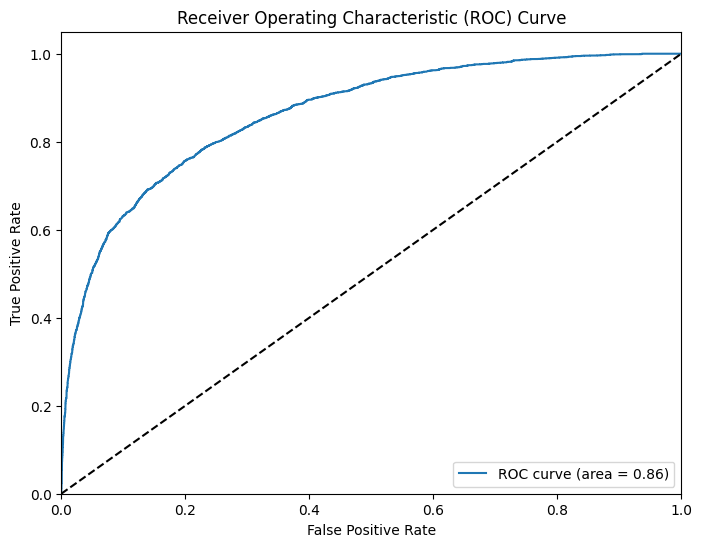

In [88]:
# Calcular y graficar la curva ROC
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_prob)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Modelo 3 - Gradient Boosting con PCA

Modelo Gradient Boosting con dataset que tiene las columnas seleccionadas por el modelo PCA.

In [89]:
# Crear y entrenar el modelo de Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=14)
gb_classifier.fit(x_train, y_train)

# Hacer predicciones
y3_pred = gb_classifier.predict(x_test)
y3_prob = gb_classifier.predict_proba(x_test)[:, 1]

In [90]:
# Evaluar el modelo
conf_matrix3 = confusion_matrix(y_test, y3_pred)
accuracy3 = accuracy_score(y_test, y3_pred)
recall3 = recall_score(y_test, y3_pred)
f1_3 = f1_score(y_test, y3_pred)

print('Matriz de Confusión:\n', conf_matrix3)
print(f'Accuracy: {100*accuracy3:.2f}%')
print(f'Recall: {100*recall3:.2f}%')
print(f'F1-Score: {100*f1_3:.2f}%')

Matriz de Confusión:
 [[5797  979]
 [2351 4468]]
Accuracy: 75.51%
Recall: 65.52%
F1-Score: 72.85%


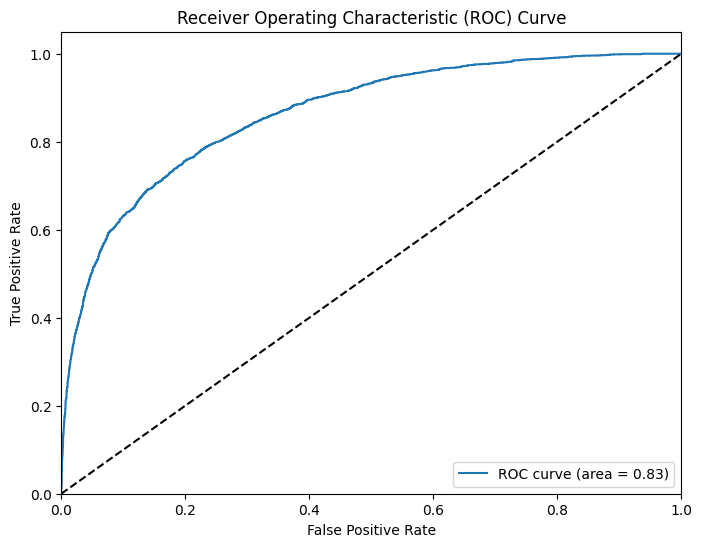

In [91]:
# Calcular y graficar la curva ROC
fpr3, tpr3, thresholds3 = roc_curve(y_test, y3_prob)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Modelo 4 - Gradient Boosting sin PCA

Modelo Gradient Boosting con dataset que no tiene las columnas seleccionadas por el modelo PCA.

In [92]:
# Crear y entrenar el modelo de Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=14)
gb_classifier.fit(x2_train, y2_train)

# Hacer predicciones
y4_pred = gb_classifier.predict(x2_test)
y4_prob = gb_classifier.predict_proba(x2_test)[:, 1]

In [93]:
# Evaluar el modelo
conf_matrix4 = confusion_matrix(y2_test, y4_pred)
accuracy4 = accuracy_score(y2_test, y4_pred)
recall4 = recall_score(y2_test, y4_pred)
f1_4 = f1_score(y2_test, y4_pred)

print('Matriz de Confusión:\n', conf_matrix4)
print(f'Accuracy: {100*accuracy4:.2f}%')
print(f'Recall: {100*recall4:.2f}%')
print(f'F1-Score: {100*f1_4:.2f}%')

Matriz de Confusión:
 [[5839  937]
 [2327 4492]]
Accuracy: 75.99%
Recall: 65.87%
F1-Score: 73.35%


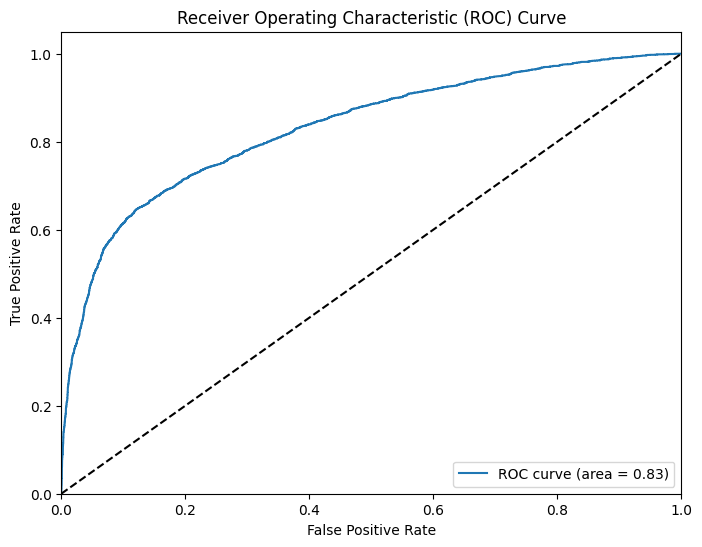

In [94]:
# Calcular y graficar la curva ROC
fpr4, tpr4, thresholds4 = roc_curve(y2_test, y4_prob)
roc_auc4 = auc(fpr4, tpr4)

plt.figure(figsize=(8, 6))
plt.plot(fpr4, tpr4, label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [95]:
metrics = {
    'Modelo 1-LightGBM con PCA': [accuracy, recall, f1, roc_auc],
    'Modelo 2-LightGBM sin PCA': [accuracy2, recall2, f1_2, roc_auc2],
    'Modelo 3-Gradient Boosting con PCA': [accuracy3, recall3, f1_3, roc_auc3],
    'Modelo 4-Gradient Boosting sin PCA': [accuracy4, recall4, f1_4, roc_auc4]
}

# Definir las etiquetas del índice personalizadas
index_labels = ['Accuracy', 'Recall', 'f1 Score', 'Curva AUC-ROC']

# Crear el DataFrame
df_metrics = pd.DataFrame(metrics, index=index_labels)

In [96]:
df_metrics.head()

,Modelo 1-LightGBM con PCA,Modelo 2-LightGBM sin PCA,Modelo 3-Gradient Boosting con PCA,Modelo 4-Gradient Boosting sin PCA
Accuracy,0.769401,0.773005,0.755057,0.759912
Recall,0.675759,0.677079,0.655228,0.658748
f1 Score,0.746174,0.749513,0.728518,0.733508
Curva AUC-ROC,0.853645,0.863964,0.828929,0.831153


## Conclusiones

- De acuerdo a la información anterior, el modelo con mayor Exactitud, Sensibilidad F1 Score y AUC-ROC es el Modelo 2, el cual usa LightGBM sin usar PCA.

- El modelo con mejore relación Rendimiento vs Costo Computacional es el Modelo 1, ya que usa LightGBM con un DataFrame optimizado con PCA.

- El redimiento de los modelos usando PCA y sin usar PCA es muy similar, por lo tanto, en entornos con recursos limitados, se recomienda los modelos con PCA, debido a se menor consumo de recursos, como por ejemplo el modelo LightGBM con PCA.

- Aunque se usan 4 métricas para evaluar el modelo, dado el caso de uso, se pueden tener en cuenta los valores de Accuracy (Exactitud) y AUC-ROC, ya que los datos para el modelo están balanceados, así como su capacidad de discriminación de instancias positivas y negativas.

- Un correcto EDA, permite simplificar y discrimar ciertas columnas, lo qcual permite optimizar los recursos necesarios para crear el modelo.

- El Data Wrangling permite trabajar con valores que pueden afectar el modelo, como los valores desconocidos (unknown) y los valores atípicos (outliers).

- El uso de One Hot Encoding y Label Encoding, pueden afectar positiva o negativamente el rendimiento del modelo.

Los Modelos que usan Gradient Boosting están ligeramente por debajo de los Modelos de LightGBM.